# Import Libraries

In [1]:
#https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
#https://medium.com/rants-on-machine-learning/7-ways-to-improve-your-predictive-models-753705eba3d6
#https://towardsdatascience.com/end-to-end-python-framework-for-predictive-modeling-b8052bb96a78
%matplotlib inline 
import datetime as dt
import pyodbc #This is to connect Python to SQL Server
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#Data collection and preprocessing
#from bs4 import beautifulSoup
import requests
import pandas as pd
import csv
#For data visualisation and statistical analysis
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression

# Connect to SQL

In [2]:
#Create a connection from Python to SQL
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-RHQE0PFG\MSSQLSERVER01;"
                      "Database=AdventureWorksDW2016;"
                      "Trusted_Connection=yes;")

In [3]:
#Import Factinternetsales from AHG SQL Datawarehouse
dbo_FIS = fctintsales = pd.read_sql_query("""
SELECT
[CustomerKey]
,[OrderQuantity]
,[SalesAmount]
,[OrderDate]
,[SalesTerritoryKey]
FROM [dbo].[FactInternetSales]""", cnxn)

In [4]:
#Top 5 records of FactInternetSales table
dbo_FIS.head(5)

CustomerKey  OrderQuantity  SalesAmount  OrderDate  SalesTerritoryKey
0        21768              1    3578.2700 2010-12-29                  6
1        28389              1    3399.9900 2010-12-29                  7
2        25863              1    3399.9900 2010-12-29                  1
3        14501              1     699.0982 2010-12-29                  4
4        11003              1    3399.9900 2010-12-29                  9

In [5]:
#Import Customer Table SQL datawarehouse using the existing connections
dbo_DC = custtbl = pd.read_sql_query("""
SELECT
[CustomerKey]
,[BirthDate]
,[MaritalStatus]
,[Gender]
,[YearlyIncome]
,[TotalChildren]
,[NumberChildrenAtHome]
,[EnglishEducation]
,[EnglishOccupation]
,[HouseOwnerFlag]
,[NumberCarsOwned]
,[DateFirstPurchase]
,[CommuteDistance]
FROM [dbo].[DimCustomer]""", cnxn)

In [6]:
#Shape
dbo_DC.shape

(18484, 13)

In [7]:
#Top 5 records of DimCustomer table 
# .dytpes function will return the datatypes

dbo_DC.head(5)
dbo_DC.dtypes

CustomerKey               int64
BirthDate                object
MaritalStatus            object
Gender                   object
YearlyIncome            float64
TotalChildren             int64
NumberChildrenAtHome      int64
EnglishEducation         object
EnglishOccupation        object
HouseOwnerFlag           object
NumberCarsOwned           int64
DateFirstPurchase        object
CommuteDistance          object
dtype: object

In [8]:
#Customer Table Info
dbo_DC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 13 columns):
CustomerKey             18484 non-null int64
BirthDate               18484 non-null object
MaritalStatus           18484 non-null object
Gender                  18484 non-null object
YearlyIncome            18484 non-null float64
TotalChildren           18484 non-null int64
NumberChildrenAtHome    18484 non-null int64
EnglishEducation        18484 non-null object
EnglishOccupation       18484 non-null object
HouseOwnerFlag          18484 non-null object
NumberCarsOwned         18484 non-null int64
DateFirstPurchase       18484 non-null object
CommuteDistance         18484 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 1.8+ MB


In [9]:
# We will change object data types to numeric by one hot encoding
# We will convert dates into date time objects later

dbo_DC = pd.get_dummies(dbo_DC, columns=['MaritalStatus','Gender','EnglishEducation','EnglishOccupation','HouseOwnerFlag',
                                   'CommuteDistance'],drop_first = False)

In [10]:
#Import Factinternetsalesreason from SQL Datawarehouse
dbo_FISR = fctinsalesreason = pd.read_sql_query("""
SELECT *
FROM [dbo].[FactInternetSalesReason]""", cnxn)

In [11]:
# Variables from Sales Reason table

dbo_FISR = pd.read_sql_query("""
SELECT
	SalesOrderNumber,
	SalesOrderLineNumber,
	SalesReasonKey
FROM FactInternetSalesReason AS FISR
""", cnxn)

In [12]:
#shape
dbo_FISR.shape

(64515, 3)

In [13]:
#Top 5 records of FactInternetSalesReason table 
dbo_FISR.head(5)

SalesOrderNumber  SalesOrderLineNumber  SalesReasonKey
0          SO43697                     1               5
1          SO43697                     1               9
2          SO43702                     1               5
3          SO43702                     1               9
4          SO43703                     1               5

In [14]:
#Import salesreason from SQL Datawarehouse
dbo_SR = salesreason = pd.read_sql_query("""
SELECT *
FROM [dbo].[DimSalesReason]""", cnxn)

In [15]:
dbo_SR = pd.read_sql_query("""
SELECT 
	SalesReasonKey,
	SalesReasonName
FROM DimSalesReason AS DSR
""", cnxn)

In [16]:
#shape
dbo_SR.shape

(10, 2)

In [17]:
#Its a good practice/habit to visualise the newly created datasets using the .head(x) function
dbo_SR.head(20)

SalesReasonKey            SalesReasonName
0               1                      Price
1               2               On Promotion
2               3     Magazine Advertisement
3               4  Television  Advertisement
4               5               Manufacturer
5               6                     Review
6               7                 Demo Event
7               8                Sponsorship
8               9                    Quality
9              10                      Other

# Summarise customer transactions and tag customers based on the churn criteria given

In [18]:
#FIS = FactInternetSales 
new_dbo_FIS = dbo_FIS.groupby('CustomerKey').agg({'SalesAmount':['sum', 'max', 'min','mean','median'], 
                         'OrderQuantity':['sum', 'max', 'min','mean','median'], 
                         'OrderDate':'max'})

In [19]:
#Top 5 records
new_dbo_FIS.head(5)

SalesAmount                                       OrderQuantity  \
                    sum      max    min         mean   median           sum   
CustomerKey                                                                   
11000           8248.99  3399.99   4.99  1031.123750    44.49             8   
11001           6383.88  3374.99   4.99   580.352727    21.98            11   
11002           8114.04  3399.99  34.99  2028.510000  2339.53             4   
11003           8139.29  3399.99   2.29   904.365556     9.99             9   
11004           8196.01  3399.99  21.98  1366.001667  1177.49             6   

                                 OrderDate  
            max min mean median        max  
CustomerKey                                 
11000         1   1    1      1 2013-05-03  
11001         1   1    1      1 2013-12-10  
11002         1   1    1      1 2013-02-23  
11003         1   1    1      1 2013-05-10  
11004         1   1    1      1 2013-05-01

In [20]:
#Join the field names to the newly aggregate fields names
new_dbo_FIS.columns = ["_".join(new_dbo_FIS) for new_dbo_FIS in new_dbo_FIS.columns.ravel()]

In [21]:
#Reset the index
new_dbo_FIS = new_dbo_FIS.reset_index()

In [22]:
#top 2 records of new_dbo_FIS
new_dbo_FIS.head(2)

CustomerKey  SalesAmount_sum  SalesAmount_max  SalesAmount_min  \
0        11000          8248.99          3399.99             4.99   
1        11001          6383.88          3374.99             4.99   

   SalesAmount_mean  SalesAmount_median  OrderQuantity_sum  OrderQuantity_max  \
0       1031.123750               44.49                  8                  1   
1        580.352727               21.98                 11                  1   

   OrderQuantity_min  OrderQuantity_mean  OrderQuantity_median OrderDate_max  
0                  1                   1                     1    2013-05-03  
1                  1                   1                     1    2013-12-10

In [23]:
#Merging the aggregated field with customer table
dbo_FIS1 = result = pd.merge(dbo_FIS,
                 dbo_DC,
                 on='CustomerKey')
dbo_FIS1.head()

CustomerKey  OrderQuantity  SalesAmount  OrderDate  SalesTerritoryKey  \
0        21768              1      3578.27 2010-12-29                  6   
1        21768              1       539.99 2013-04-14                  6   
2        28389              1      3399.99 2010-12-29                  7   
3        25863              1      3399.99 2010-12-29                  1   
4        25863              1      1214.85 2013-07-26                  1   

    BirthDate  YearlyIncome  TotalChildren  NumberChildrenAtHome  \
0  1952-02-19       70000.0              5                     0   
1  1952-02-19       70000.0              5                     0   
2  1970-06-17       20000.0              3                     3   
3  1952-06-01       40000.0              5                     0   
4  1952-06-01       40000.0              5                     0   

   NumberCarsOwned  ... EnglishOccupation_Manual  \
0                3  ...                        0   
1                3  ...                        0   
2                0  ...                        1   
3                3  ...                        0   
4                3  ...                        0   

   EnglishOccupation_Professional  EnglishOccupation_Skilled Manual  \
0                               0                                 0   
1                               0                                 0   
2                               0                                 0   
3                               1                                 0   
4                               1                                 0   

   HouseOwnerFlag_0  HouseOwnerFlag_1  CommuteDistance_0-1 Miles  \
0                 0                 1                          0   
1                 0                 1                          0   
2                 1                 0                          1   
3                 0                 1                          0   
4                 0                 1                          0   

   CommuteDistance_1-2 Miles  CommuteDistance_10+ Miles  \
0                          0                          1   
1                          0                          1   
2                          0                          0   
3                          0                          1   
4                          0                          1   

   CommuteDistance_2-5 Miles  CommuteDistance_5-10 Miles  
0                          0                           0  
1                          0                           0  
2                          0                           0  
3                          0                           0  
4                          0                           0  

[5 rows x 32 columns]

In [24]:
#Prepare Salesreason data and merge required tables
#dbo_FISR = FactInternetSalesReason
#dbo_SR = SalesReason
dbo_FISR1 = reason = pd.merge(dbo_FISR,
                 dbo_SR,
                 on='SalesReasonKey')
dbo_FISR1.head()

SalesOrderNumber  SalesOrderLineNumber  SalesReasonKey SalesReasonName
0          SO43697                     1               5    Manufacturer
1          SO43702                     1               5    Manufacturer
2          SO43703                     1               5    Manufacturer
3          SO43706                     1               5    Manufacturer
4          SO43707                     1               5    Manufacturer

In [25]:
dbo_FISR1.shape

(64515, 4)

# Reasoning:
Why are we creating dummies of sales reason names and then joining with df_DC?

Because .shape tells us that sales reason is giving us 64515 rows whereas df_DC has 18484 rows (actual number of customers). If we won't create dummies before joining two dataframes, we will get duplicate entries. 

For this model, we need one row for one customer.

In [26]:
#Dummify the Salesreasonname so that the values becomes variables
dbo_FISR2 = reason_ = pd.get_dummies(reason.SalesReasonName,columns=['Price', 'On Promotion', 'Magazine Advertisement', 'Television Advertisement', 'TV', 'Manufacturer', 'Review','Demo Event', 'Sponsorship', 'Quality', 'Other'])

In [27]:
#Concatenate reason and reason_
dbo_FISR1 = pd.concat([dbo_FISR1, dbo_FISR2],axis=1)

In [28]:
#Bottom 
dbo_FISR1.tail(1000)

SalesOrderNumber  SalesOrderLineNumber  SalesReasonKey  \
63515          SO73899                     2              10   
63516          SO73899                     3              10   
63517          SO73900                     1              10   
63518          SO73900                     2              10   
63519          SO73913                     1              10   
...                ...                   ...             ...   
64510          SO75011                     1               4   
64511          SO75056                     1               4   
64512          SO75065                     1               4   
64513          SO75087                     1               4   
64514          SO75095                     1               4   

                 SalesReasonName  Manufacturer  On Promotion  Other  Price  \
63515                      Other             0             0      1      0   
63516                      Other             0             0      1      0   
63517                      Other             0             0      1      0   
63518                      Other             0             0      1      0   
63519                      Other             0             0      1      0   
...                          ...           ...           ...    ...    ...   
64510  Television  Advertisement             0             0      0      0   
64511  Television  Advertisement             0             0      0      0   
64512  Television  Advertisement             0             0      0      0   
64513  Television  Advertisement             0             0      0      0   
64514  Television  Advertisement             0             0      0      0   

       Quality  Review  Television  Advertisement  
63515        0       0                          0  
63516        0       0                          0  
63517        0       0                          0  
63518        0       0                          0  
63519        0       0                          0  
...        ...     ...                        ...  
64510        0       0                          1  
64511        0       0                          1  
64512        0       0                          1  
64513        0       0                          1  
64514        0       0                          1  

[1000 rows x 11 columns]

In [29]:
#Top records
dbo_FISR1.head()

SalesOrderNumber  SalesOrderLineNumber  SalesReasonKey SalesReasonName  \
0          SO43697                     1               5    Manufacturer   
1          SO43702                     1               5    Manufacturer   
2          SO43703                     1               5    Manufacturer   
3          SO43706                     1               5    Manufacturer   
4          SO43707                     1               5    Manufacturer   

   Manufacturer  On Promotion  Other  Price  Quality  Review  \
0             1             0      0      0        0       0   
1             1             0      0      0        0       0   
2             1             0      0      0        0       0   
3             1             0      0      0        0       0   
4             1             0      0      0        0       0   

   Television  Advertisement  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [30]:
dbo_FISR1.shape

(64515, 11)

In [31]:
#Re Import Factinternetsales from SQL Datawarehouse
dbo_FIS = pd.read_sql_query("""
SELECT
[CustomerKey]
,[SalesOrderNumber]
FROM [dbo].[FactInternetSales]""", cnxn)

In [32]:
#Join factinternetsales back to prepared Salesreason data
dbo_FISR2 = pd.merge(dbo_FIS,
                 dbo_FISR1,
                 on='SalesOrderNumber')

In [33]:
#Top records
dbo_FISR2.head(10)

CustomerKey SalesOrderNumber  SalesOrderLineNumber  SalesReasonKey  \
0        21768          SO43697                     1               5   
1        21768          SO43697                     1               9   
2        27645          SO43702                     1               5   
3        27645          SO43702                     1               9   
4        16624          SO43703                     1               5   
5        16624          SO43703                     1               9   
6        27621          SO43706                     1               5   
7        27621          SO43706                     1               9   
8        27616          SO43707                     1               5   
9        27616          SO43707                     1               9   

  SalesReasonName  Manufacturer  On Promotion  Other  Price  Quality  Review  \
0    Manufacturer             1             0      0      0        0       0   
1         Quality             0             0      0      0        1       0   
2    Manufacturer             1             0      0      0        0       0   
3         Quality             0             0      0      0        1       0   
4    Manufacturer             1             0      0      0        0       0   
5         Quality             0             0      0      0        1       0   
6    Manufacturer             1             0      0      0        0       0   
7         Quality             0             0      0      0        1       0   
8    Manufacturer             1             0      0      0        0       0   
9         Quality             0             0      0      0        1       0   

   Television  Advertisement  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
5                          0  
6                          0  
7                          0  
8                          0  
9                          0

In [34]:
#Aggregate Sales Reason (dbo_FISR2) to prevent duplication of customer information
dbo_FISR2 = dbo_FISR2.groupby('CustomerKey').agg({'Manufacturer':'max', 
                         'On Promotion':'max', 
                         'Other':'max',
                          'Price':'max',
                            'Quality':'max',
                              'Review':'max',
                                'Television  Advertisement':'max'}).reset_index()

In [35]:
dbo_FISR2.shape

(17022, 8)

In [36]:
dbo_FISR2.head()

CustomerKey  Manufacturer  On Promotion  Other  Price  Quality  Review  \
0        11000             0             1      0      1        0       0   
1        11001             0             0      0      1        0       0   
2        11002             0             1      0      0        0       0   
3        11003             0             0      0      1        0       0   
4        11004             0             0      0      1        0       0   

   Television  Advertisement  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [37]:
#We can now merge dbo_FISR2 with dbo_DC
#left join main data back to summarise sales reason data
dbo_DC1 = pd.merge(dbo_DC,
                 dbo_FISR2,
                 on='CustomerKey', how='left')

In [38]:
#Top 5 records dbo_DC1
dbo_DC1.head(5)

CustomerKey   BirthDate  YearlyIncome  TotalChildren  NumberChildrenAtHome  \
0        11000  1971-10-06       90000.0              2                     0   
1        11001  1976-05-10       60000.0              3                     3   
2        11002  1971-02-09       60000.0              3                     3   
3        11003  1973-08-14       70000.0              0                     0   
4        11004  1979-08-05       80000.0              5                     5   

   NumberCarsOwned DateFirstPurchase  MaritalStatus_M  MaritalStatus_S  \
0                0        2011-01-19                1                0   
1                1        2011-01-15                0                1   
2                1        2011-01-07                1                0   
3                1        2010-12-29                0                1   
4                4        2011-01-23                0                1   

   Gender_F  ...  CommuteDistance_10+ Miles  CommuteDistance_2-5 Miles  \
0         0  ...                          0                          0   
1         0  ...                          0                          0   
2         0  ...                          0                          1   
3         1  ...                          0                          0   
4         1  ...                          0                          0   

   CommuteDistance_5-10 Miles  Manufacturer  On Promotion  Other  Price  \
0                           0           0.0           1.0    0.0    1.0   
1                           0           0.0           0.0    0.0    1.0   
2                           0           0.0           1.0    0.0    0.0   
3                           1           0.0           0.0    0.0    1.0   
4                           0           0.0           0.0    0.0    1.0   

   Quality  Review  Television  Advertisement  
0      0.0     0.0                        0.0  
1      0.0     0.0                        0.0  
2      0.0     0.0                        0.0  
3      0.0     0.0                        0.0  
4      0.0     0.0                        0.0  

[5 rows x 35 columns]

In [39]:
#dbo_DC1 shape
dbo_DC1.shape

(18484, 35)

In [40]:
#dbo_DC1 Info
dbo_DC1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 35 columns):
CustomerKey                             18484 non-null int64
BirthDate                               18484 non-null object
YearlyIncome                            18484 non-null float64
TotalChildren                           18484 non-null int64
NumberChildrenAtHome                    18484 non-null int64
NumberCarsOwned                         18484 non-null int64
DateFirstPurchase                       18484 non-null object
MaritalStatus_M                         18484 non-null uint8
MaritalStatus_S                         18484 non-null uint8
Gender_F                                18484 non-null uint8
Gender_M                                18484 non-null uint8
EnglishEducation_Bachelors              18484 non-null uint8
EnglishEducation_Graduate Degree        18484 non-null uint8
EnglishEducation_High School            18484 non-null uint8
EnglishEducation_Partial College 


*We now have successfully got our sales reasons alongwith unque customers. 
*We will now concentrate on numerical variables

# Numerical Variables

In [41]:
dbo_FIS1 = pd.read_sql_query("""
SELECT 
CustomerKey,
OrderQuantity,
SalesAmount
FROM FactInternetSales AS FIS1
""", cnxn)

In [42]:
#shape
#top records
print(dbo_FIS1.shape)
dbo_FIS1.head()

(60398, 3)


CustomerKey  OrderQuantity  SalesAmount
0        21768              1    3578.2700
1        28389              1    3399.9900
2        25863              1    3399.9900
3        14501              1     699.0982
4        11003              1    3399.9900

*dbo_FIS1.shape tells us that there are 60398 rows. We need to reduce the number of rows to distinct number of customers, 18484.

In [43]:
# We will use groupby function to get numerical variables for unique customers

dbo_FIS1 = dbo_FIS1.groupby("CustomerKey").agg({'OrderQuantity':['sum','max','min','mean','median'],
                                                 'SalesAmount':['sum','max','min','mean','median']})

In [44]:
print(dbo_FIS1.shape)
dbo_FIS1.head()

(18484, 10)


OrderQuantity                     SalesAmount                  \
                      sum max min mean median         sum      max    min   
CustomerKey                                                                 
11000                   8   1   1    1      1     8248.99  3399.99   4.99   
11001                  11   1   1    1      1     6383.88  3374.99   4.99   
11002                   4   1   1    1      1     8114.04  3399.99  34.99   
11003                   9   1   1    1      1     8139.29  3399.99   2.29   
11004                   6   1   1    1      1     8196.01  3399.99  21.98   

                                   
                    mean   median  
CustomerKey                        
11000        1031.123750    44.49  
11001         580.352727    21.98  
11002        2028.510000  2339.53  
11003         904.365556     9.99  
11004        1366.001667  1177.49

In [45]:
dbo_FIS1.columns = ["_".join(dbo_FIS1) for dbo_FIS1 in dbo_FIS1.columns.ravel()]
dbo_FIS1 = dbo_FIS1.reset_index()
dbo_FIS1.head()

CustomerKey  OrderQuantity_sum  OrderQuantity_max  OrderQuantity_min  \
0        11000                  8                  1                  1   
1        11001                 11                  1                  1   
2        11002                  4                  1                  1   
3        11003                  9                  1                  1   
4        11004                  6                  1                  1   

   OrderQuantity_mean  OrderQuantity_median  SalesAmount_sum  SalesAmount_max  \
0                   1                     1          8248.99          3399.99   
1                   1                     1          6383.88          3374.99   
2                   1                     1          8114.04          3399.99   
3                   1                     1          8139.29          3399.99   
4                   1                     1          8196.01          3399.99   

   SalesAmount_min  SalesAmount_mean  SalesAmount_median  
0             4.99       1031.123750               44.49  
1             4.99        580.352727               21.98  
2            34.99       2028.510000             2339.53  
3             2.29        904.365556                9.99  
4            21.98       1366.001667             1177.49

In [46]:
dbo_FIS2 = pd.merge(dbo_FIS1, dbo_DC, on='CustomerKey')

In [47]:
print(dbo_FIS2.shape)
dbo_FIS2.head()

(18484, 38)


CustomerKey  OrderQuantity_sum  OrderQuantity_max  OrderQuantity_min  \
0        11000                  8                  1                  1   
1        11001                 11                  1                  1   
2        11002                  4                  1                  1   
3        11003                  9                  1                  1   
4        11004                  6                  1                  1   

   OrderQuantity_mean  OrderQuantity_median  SalesAmount_sum  SalesAmount_max  \
0                   1                     1          8248.99          3399.99   
1                   1                     1          6383.88          3374.99   
2                   1                     1          8114.04          3399.99   
3                   1                     1          8139.29          3399.99   
4                   1                     1          8196.01          3399.99   

   SalesAmount_min  SalesAmount_mean  ...  EnglishOccupation_Manual  \
0             4.99       1031.123750  ...                         0   
1             4.99        580.352727  ...                         0   
2            34.99       2028.510000  ...                         0   
3             2.29        904.365556  ...                         0   
4            21.98       1366.001667  ...                         0   

  EnglishOccupation_Professional  EnglishOccupation_Skilled Manual  \
0                              1                                 0   
1                              1                                 0   
2                              1                                 0   
3                              1                                 0   
4                              1                                 0   

   HouseOwnerFlag_0  HouseOwnerFlag_1  CommuteDistance_0-1 Miles  \
0                 0                 1                          0   
1                 1                 0                          1   
2                 0                 1                          0   
3                 1                 0                          0   
4                 0                 1                          0   

  CommuteDistance_1-2 Miles  CommuteDistance_10+ Miles  \
0                         1                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         1                          0   

   CommuteDistance_2-5 Miles  CommuteDistance_5-10 Miles  
0                          0                           0  
1                          0                           0  
2                          1                           0  
3                          0                           1  
4                          0                           0  

[5 rows x 38 columns]

*We will now merge Numeric variables with categorical variables

In [48]:
dbo_DC2 = pd.merge(dbo_DC1, dbo_FIS1, on='CustomerKey', how='left' )
print(dbo_DC2.shape)
dbo_DC2.head()

(18484, 45)


CustomerKey   BirthDate  YearlyIncome  TotalChildren  NumberChildrenAtHome  \
0        11000  1971-10-06       90000.0              2                     0   
1        11001  1976-05-10       60000.0              3                     3   
2        11002  1971-02-09       60000.0              3                     3   
3        11003  1973-08-14       70000.0              0                     0   
4        11004  1979-08-05       80000.0              5                     5   

   NumberCarsOwned DateFirstPurchase  MaritalStatus_M  MaritalStatus_S  \
0                0        2011-01-19                1                0   
1                1        2011-01-15                0                1   
2                1        2011-01-07                1                0   
3                1        2010-12-29                0                1   
4                4        2011-01-23                0                1   

   Gender_F  ...  OrderQuantity_sum  OrderQuantity_max  OrderQuantity_min  \
0         0  ...                  8                  1                  1   
1         0  ...                 11                  1                  1   
2         0  ...                  4                  1                  1   
3         1  ...                  9                  1                  1   
4         1  ...                  6                  1                  1   

   OrderQuantity_mean  OrderQuantity_median  SalesAmount_sum  SalesAmount_max  \
0                   1                     1          8248.99          3399.99   
1                   1                     1          6383.88          3374.99   
2                   1                     1          8114.04          3399.99   
3                   1                     1          8139.29          3399.99   
4                   1                     1          8196.01          3399.99   

   SalesAmount_min  SalesAmount_mean  SalesAmount_median  
0             4.99       1031.123750               44.49  
1             4.99        580.352727               21.98  
2            34.99       2028.510000             2339.53  
3             2.29        904.365556                9.99  
4            21.98       1366.001667             1177.49  

[5 rows x 45 columns]

In [49]:
dbo_DC2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 45 columns):
CustomerKey                             18484 non-null int64
BirthDate                               18484 non-null object
YearlyIncome                            18484 non-null float64
TotalChildren                           18484 non-null int64
NumberChildrenAtHome                    18484 non-null int64
NumberCarsOwned                         18484 non-null int64
DateFirstPurchase                       18484 non-null object
MaritalStatus_M                         18484 non-null uint8
MaritalStatus_S                         18484 non-null uint8
Gender_F                                18484 non-null uint8
Gender_M                                18484 non-null uint8
EnglishEducation_Bachelors              18484 non-null uint8
EnglishEducation_Graduate Degree        18484 non-null uint8
EnglishEducation_High School            18484 non-null uint8
EnglishEducation_Partial College 

# Derived Variables

In [50]:
#Calculating tenure in months to check the length of time customer was with the company

dbo_FIS4 = pd.read_sql_query("""
SELECT 
CustomerKey
,OrderDate
FROM FactInternetSales AS FIS4
""", cnxn)

In [51]:
dbo_FIS4.shape

(60398, 2)

In [52]:
dbo_FIS4.head()

CustomerKey  OrderDate
0        21768 2010-12-29
1        28389 2010-12-29
2        25863 2010-12-29
3        14501 2010-12-29
4        11003 2010-12-29

In [53]:
#Aggregate Sales Reason (dbo_FISR2) to prevent duplication of customer information
dbo_FIS4 = dbo_FIS4.groupby('CustomerKey').agg({'OrderDate':['max']})
dbo_FIS4.columns = ["_".join(dbo_FIS4) for dbo_FIS4 in dbo_FIS4.columns.ravel()]
dbo_FIS4 = dbo_FIS4.reset_index()

In [54]:
print(dbo_FIS4.shape)
dbo_FIS4.head()

(18484, 2)


CustomerKey OrderDate_max
0        11000    2013-05-03
1        11001    2013-12-10
2        11002    2013-02-23
3        11003    2013-05-10
4        11004    2013-05-01

In [55]:
#Merge dbo_FIS4 with dbo_DC2 and call this new table dbo_DC3

dbo_DC3 = pd.merge(dbo_DC2, dbo_FIS4, on='CustomerKey', how='left')

In [56]:
# Use .dt.date function to take out the date part from the date, excluding the timezone information
# refer to "https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html" for more info on timedelta

dbo_DC3['Tenure_Months'] = ((dbo_DC3['OrderDate_max'].dt.date - dbo_DC3['DateFirstPurchase'])/np.timedelta64(1, 'M')).astype(int)

In [58]:
# Calculate the age of customers

dbo_DC3['Age'] = ((dbo_DC3['OrderDate_max'].dt.date -  dbo_DC3['BirthDate'])/np.timedelta64(1, 'Y')).astype(int)

In [59]:
# We will calculate the last purchase date of customer

dbo_DC3['Last_Purchase_Date'] = dbo_DC3['OrderDate_max'].dt.date

In [60]:
dbo_DC3['Cutoff_Date'] = '2013-06-01'

In [61]:
# To correctly utilise the dates to create churn variable, we will have to check data types
dbo_DC3.dtypes

CustomerKey                                      int64
BirthDate                                       object
YearlyIncome                                   float64
TotalChildren                                    int64
NumberChildrenAtHome                             int64
NumberCarsOwned                                  int64
DateFirstPurchase                               object
MaritalStatus_M                                  uint8
MaritalStatus_S                                  uint8
Gender_F                                         uint8
Gender_M                                         uint8
EnglishEducation_Bachelors                       uint8
EnglishEducation_Graduate Degree                 uint8
EnglishEducation_High School                     uint8
EnglishEducation_Partial College                 uint8
EnglishEducation_Partial High School             uint8
EnglishOccupation_Clerical                       uint8
EnglishOccupation_Management                     uint8
EnglishOcc

In [62]:
dbo_DC3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 50 columns):
CustomerKey                             18484 non-null int64
BirthDate                               18484 non-null object
YearlyIncome                            18484 non-null float64
TotalChildren                           18484 non-null int64
NumberChildrenAtHome                    18484 non-null int64
NumberCarsOwned                         18484 non-null int64
DateFirstPurchase                       18484 non-null object
MaritalStatus_M                         18484 non-null uint8
MaritalStatus_S                         18484 non-null uint8
Gender_F                                18484 non-null uint8
Gender_M                                18484 non-null uint8
EnglishEducation_Bachelors              18484 non-null uint8
EnglishEducation_Graduate Degree        18484 non-null uint8
EnglishEducation_High School            18484 non-null uint8
EnglishEducation_Partial College 

In [63]:
dbo_FIS1.types

AttributeError: 'DataFrame' object has no attribute 'types'

In [64]:
# Last_Purchase_Date and Cutoff_Date are objects, they need to be changed to datetime variables 

dbo_DC3['Last_Purchase_Date'] = pd.to_datetime(dbo_DC3['Last_Purchase_Date'], format="%Y-%m-%d")
dbo_DC3['Cutoff_Date'] = pd.to_datetime(dbo_DC3['Cutoff_Date'], format="%Y-%m-%d")

In [65]:
# Create churn variable. Customers who churned will be assigned 1 and those who didnt will be assigned 0

dbo_DC3['Churn'] = np.where(dbo_DC3['Last_Purchase_Date'] <= dbo_DC3['Cutoff_Date'], 1, 0)

In [66]:
print(dbo_DC3.shape)
dbo_DC3.head()

(18484, 51)


CustomerKey   BirthDate  YearlyIncome  TotalChildren  NumberChildrenAtHome  \
0        11000  1971-10-06       90000.0              2                     0   
1        11001  1976-05-10       60000.0              3                     3   
2        11002  1971-02-09       60000.0              3                     3   
3        11003  1973-08-14       70000.0              0                     0   
4        11004  1979-08-05       80000.0              5                     5   

   NumberCarsOwned DateFirstPurchase  MaritalStatus_M  MaritalStatus_S  \
0                0        2011-01-19                1                0   
1                1        2011-01-15                0                1   
2                1        2011-01-07                1                0   
3                1        2010-12-29                0                1   
4                4        2011-01-23                0                1   

   Gender_F  ...  SalesAmount_max  SalesAmount_min  SalesAmount_mean  \
0         0  ...          3399.99             4.99       1031.123750   
1         0  ...          3374.99             4.99        580.352727   
2         0  ...          3399.99            34.99       2028.510000   
3         1  ...          3399.99             2.29        904.365556   
4         1  ...          3399.99            21.98       1366.001667   

   SalesAmount_median  OrderDate_max  Tenure_Months  Age  Last_Purchase_Date  \
0               44.49     2013-05-03             27   41          2013-05-03   
1               21.98     2013-12-10             34   37          2013-12-10   
2             2339.53     2013-02-23             25   42          2013-02-23   
3                9.99     2013-05-10             28   39          2013-05-10   
4             1177.49     2013-05-01             27   33          2013-05-01   

   Cutoff_Date  Churn  
0   2013-06-01      1  
1   2013-06-01      0  
2   2013-06-01      1  
3   2013-06-01      1  
4   2013-06-01      1  

[5 rows x 51 columns]

Now we have final set of variables to create our model.

Before creating the model, selecting the best features which have the high probability of influence on the result is needed

Before diving into fetaure selection methods, taking out a hold out sample of data which will act as live data is needed.

fetaure selection and model selection, training and testing will be done on training data.

# Extraction of Hold Out Sample Data

In [67]:
#reviewing the no of records in the target field - Churn #Total customers= 18484 70%= 12876 non churners 30%= 5608 churners
dbo_DC3['Churn'].value_counts()

0    12876
1     5608
Name: Churn, dtype: int64

In [68]:
# Separate churners from non-churners
churners = dbo_DC3.loc[dbo_DC3['Churn']==1]
non_churners = dbo_DC3.loc[dbo_DC3['Churn']==0]

In [69]:
print(churners['Churn'].value_counts()) 
print(non_churners['Churn'].value_counts())

1    5608
Name: Churn, dtype: int64
0    12876
Name: Churn, dtype: int64


In [70]:
# We need to split non_churners into half so that we hold out sample data.
# We will utilise train_test_split to randomly separate the data

from sklearn.model_selection import train_test_split

sample_data, non_churners_data = train_test_split(non_churners, test_size=0.5, random_state=43)

In [71]:
print(sample_data['Churn'].value_counts())
print(non_churners_data['Churn'].value_counts())

0    6438
Name: Churn, dtype: int64
0    6438
Name: Churn, dtype: int64


In [72]:
#Now  we'll comibine non_churners_data with non_churners. It will be our training data
#Append Churners and non churners excluding the hold out sample for scoring
training_data = pd.concat([churners, non_churners_data], ignore_index=True)

In [73]:
training_data['Churn'].value_counts()

0    6438
1    5608
Name: Churn, dtype: int64

We will utilise training_data to select features and model

# Feature Selection Methods

There are 3 different methods which have their own merits/benefits of use. We will check all of them to see which one gives us the best result. These methods are:
Filter Method
Wrapper Method
Embedded Method

# Filter Method for Feature Selection

Reference: https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

    Filter methods can be classified into:
Univariate
Multivariate

Univariate Methods: 

    These are the filter methods where features are ranked according to specified criteria 
    i.e. Fisher Score, Mutual Information and Variance. 
    Its ideal for removing constant features and quasi constant features. 
    Major drawback is that it may include reduntant features because relationships between features are not taken into account.

Multivariate Methods:

    These are the methods which take relationships between features into account. 
    Ideal for removing correlated and duplicated features.

# Removing Constant features

Constant features are features which contain only one value for all outputs. They provide no information that can help so its ideal to remove them.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [75]:
features = training_data.drop(columns=['Churn'], axis=1)
labels = training_data['Churn']

In [76]:
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.2,random_state=38)

In [77]:
features.dtypes

CustomerKey                                      int64
BirthDate                                       object
YearlyIncome                                   float64
TotalChildren                                    int64
NumberChildrenAtHome                             int64
NumberCarsOwned                                  int64
DateFirstPurchase                               object
MaritalStatus_M                                  uint8
MaritalStatus_S                                  uint8
Gender_F                                         uint8
Gender_M                                         uint8
EnglishEducation_Bachelors                       uint8
EnglishEducation_Graduate Degree                 uint8
EnglishEducation_High School                     uint8
EnglishEducation_Partial College                 uint8
EnglishEducation_Partial High School             uint8
EnglishOccupation_Clerical                       uint8
EnglishOccupation_Management                     uint8
EnglishOcc

In [78]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12046 entries, 0 to 12045
Data columns (total 50 columns):
CustomerKey                             12046 non-null int64
BirthDate                               12046 non-null object
YearlyIncome                            12046 non-null float64
TotalChildren                           12046 non-null int64
NumberChildrenAtHome                    12046 non-null int64
NumberCarsOwned                         12046 non-null int64
DateFirstPurchase                       12046 non-null object
MaritalStatus_M                         12046 non-null uint8
MaritalStatus_S                         12046 non-null uint8
Gender_F                                12046 non-null uint8
Gender_M                                12046 non-null uint8
EnglishEducation_Bachelors              12046 non-null uint8
EnglishEducation_Graduate Degree        12046 non-null uint8
EnglishEducation_High School            12046 non-null uint8
EnglishEducation_Partial College 

In [79]:
# only numeric variables can be included in this method, so dates have to be removed.
# Removed CustomerKey because it will have no impact on the model

features = training_data.drop(columns=['CustomerKey','Churn','Cutoff_Date','Last_Purchase_Date', 'OrderDate_max','DateFirstPurchase',
                               'BirthDate'], axis=1)

In [80]:
#Identify missing values

features.isnull().mean().sort_values(ascending=False)*100

Television  Advertisement               8.35132
Review                                  8.35132
Manufacturer                            8.35132
On Promotion                            8.35132
Other                                   8.35132
Price                                   8.35132
Quality                                 8.35132
EnglishOccupation_Manual                0.00000
EnglishOccupation_Management            0.00000
EnglishOccupation_Clerical              0.00000
EnglishEducation_Partial High School    0.00000
EnglishEducation_Partial College        0.00000
Age                                     0.00000
EnglishOccupation_Skilled Manual        0.00000
EnglishEducation_High School            0.00000
EnglishEducation_Graduate Degree        0.00000
EnglishEducation_Bachelors              0.00000
Gender_M                                0.00000
Gender_F                                0.00000
MaritalStatus_S                         0.00000
MaritalStatus_M                         

In [81]:
#replace missing values with most frequent values
features = features.fillna(features.mode().iloc[0])

In [82]:
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.2,random_state=38)

We will employ constant filter from variance threshold and pass 0 as a parameter. 
It will filter all those features whose value is 0.

In [83]:
constant_filter = VarianceThreshold(threshold=0)

In [84]:
#apply constant filter to training set
constant_filter.fit(train_features)

VarianceThreshold(threshold=0)

In [85]:
#Use get_support function to get the features that are not constant
len(train_features.columns[constant_filter.get_support()])

40

Result shows that there are 40 features which are not constant

In [86]:
#To get constant columns

constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

print(len(constant_columns))

4


In [87]:
#Show the list of constant columns

for column in constant_columns:
    print(column)

OrderQuantity_max
OrderQuantity_min
OrderQuantity_mean
OrderQuantity_median


In [88]:
#To remove constant features, use transform function

train_features = constant_filter.transform(train_features)
test_features = constant_filter.transform(test_features)

In [89]:
train_features.shape, test_features.shape

((9636, 40), (2410, 40))

In [90]:
#Remove/drop constant features directly from features dataframe

features = features.drop(constant_columns, axis=1)

# Remove Quasi Constant Features

In [91]:
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.2,random_state=38)

We set the threshold limit 
which indicates that if the variance between features is less than threshold value then remove those features. 
i.e. if threshold value is 0.01, 
that means features which have lower value than threshold, 
are more than 99% similar and need to be removed

In [92]:
quasi_constant_filter = VarianceThreshold(threshold=0.1)

In [93]:
quasi_constant_filter.fit(train_features)

VarianceThreshold(threshold=0.1)

In [94]:
len(train_features.columns[quasi_constant_filter.get_support()])

34

In [95]:
quasi_constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[quasi_constant_filter.get_support()]]

print(len(quasi_constant_columns))

6


In [96]:
for column in quasi_constant_columns:
    print(column)

EnglishEducation_Partial High School
Manufacturer
Other
Quality
Review
Television  Advertisement


In [97]:
train_features = quasi_constant_filter.transform(train_features)
test_features = quasi_constant_filter.transform(test_features)

train_features.shape, test_features.shape

((9636, 34), (2410, 34))

In [98]:
#Finally drop the columns from features
features = features.drop(quasi_constant_columns, axis=1)

Columns have reduced from 51 to 35. Check further for duplicate columns and remove them too.

# Removing Duplicate Features

Duplicate features do not add any value to algorithm training. Rather they add overheads and unnecessary delay

In [99]:
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.2,random_state=38)

In [100]:
#We can use transpose method and see if there are an duplicates since there is no built in formula to remove duplicates
train_features_T = train_features.T
train_features_T.shape

(34, 9636)

In [101]:
#Check for duplicates
print(train_features_T.duplicated().sum())

0


*
As shown there are no duplicated features. 
If there were any duplicated columns then we could have employed following code to remove them
unique_features = train_features_T.drop_duplicates(keep='first').T
unique_features.shape
duplicated_features = [dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features
features = features.drop(duplicated_features, axis=1)
*
We now have our set of 34 features. 
These features will be subjected to further evaluation to remove any columns which will not be of influence.
We will now look at correlation method and chi2 method

# Correlated Features

Correlation only works with numerical data. 
We need to filter out the numeric data
Find the fetaures which are highly correlated and remove them as they do not give desired results.

In [102]:
features.dtypes

YearlyIncome                        float64
TotalChildren                         int64
NumberChildrenAtHome                  int64
NumberCarsOwned                       int64
MaritalStatus_M                       uint8
MaritalStatus_S                       uint8
Gender_F                              uint8
Gender_M                              uint8
EnglishEducation_Bachelors            uint8
EnglishEducation_Graduate Degree      uint8
EnglishEducation_High School          uint8
EnglishEducation_Partial College      uint8
EnglishOccupation_Clerical            uint8
EnglishOccupation_Management          uint8
EnglishOccupation_Manual              uint8
EnglishOccupation_Professional        uint8
EnglishOccupation_Skilled Manual      uint8
HouseOwnerFlag_0                      uint8
HouseOwnerFlag_1                      uint8
CommuteDistance_0-1 Miles             uint8
CommuteDistance_1-2 Miles             uint8
CommuteDistance_10+ Miles             uint8
CommuteDistance_2-5 Miles       

In [103]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12046 entries, 0 to 12045
Data columns (total 34 columns):
YearlyIncome                        12046 non-null float64
TotalChildren                       12046 non-null int64
NumberChildrenAtHome                12046 non-null int64
NumberCarsOwned                     12046 non-null int64
MaritalStatus_M                     12046 non-null uint8
MaritalStatus_S                     12046 non-null uint8
Gender_F                            12046 non-null uint8
Gender_M                            12046 non-null uint8
EnglishEducation_Bachelors          12046 non-null uint8
EnglishEducation_Graduate Degree    12046 non-null uint8
EnglishEducation_High School        12046 non-null uint8
EnglishEducation_Partial College    12046 non-null uint8
EnglishOccupation_Clerical          12046 non-null uint8
EnglishOccupation_Management        12046 non-null uint8
EnglishOccupation_Manual            12046 non-null uint8
EnglishOccupation_Professional    

*
We will separate numerical features from categorical features.
Then we will create new df by concating features with labels

In [104]:
#separate numerical features from categorical features
num_features = features[['YearlyIncome','TotalChildren','NumberChildrenAtHome','NumberCarsOwned','Price',
                         'OrderQuantity_sum','SalesAmount_sum','SalesAmount_max','SalesAmount_min','SalesAmount_mean',
                        'SalesAmount_median','Tenure_Months','Age']]

In [105]:
#concatinate features with labels
num_training_data = pd.concat([num_features, labels], axis=1)

In [106]:
#name/define the concatinated attributes 
cat_features = features[['MaritalStatus_M','MaritalStatus_S', 'Gender_F','Gender_M', 'EnglishEducation_Bachelors',
                        'EnglishEducation_Graduate Degree', 'EnglishEducation_High School','EnglishEducation_Partial College',
                        'EnglishOccupation_Clerical','EnglishOccupation_Management', 'EnglishOccupation_Manual',
                        'EnglishOccupation_Professional', 'EnglishOccupation_Skilled Manual','HouseOwnerFlag_0',
                         'HouseOwnerFlag_1','CommuteDistance_0-1 Miles','CommuteDistance_1-2 Miles', 
                         'CommuteDistance_10+ Miles','CommuteDistance_2-5 Miles', 'CommuteDistance_5-10 Miles']]

In [107]:
cat_training_data = pd.concat([cat_features,labels],axis=1)

# Deal first with Numerical Variables

# Visual Representation of Numerical Variables

In [108]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

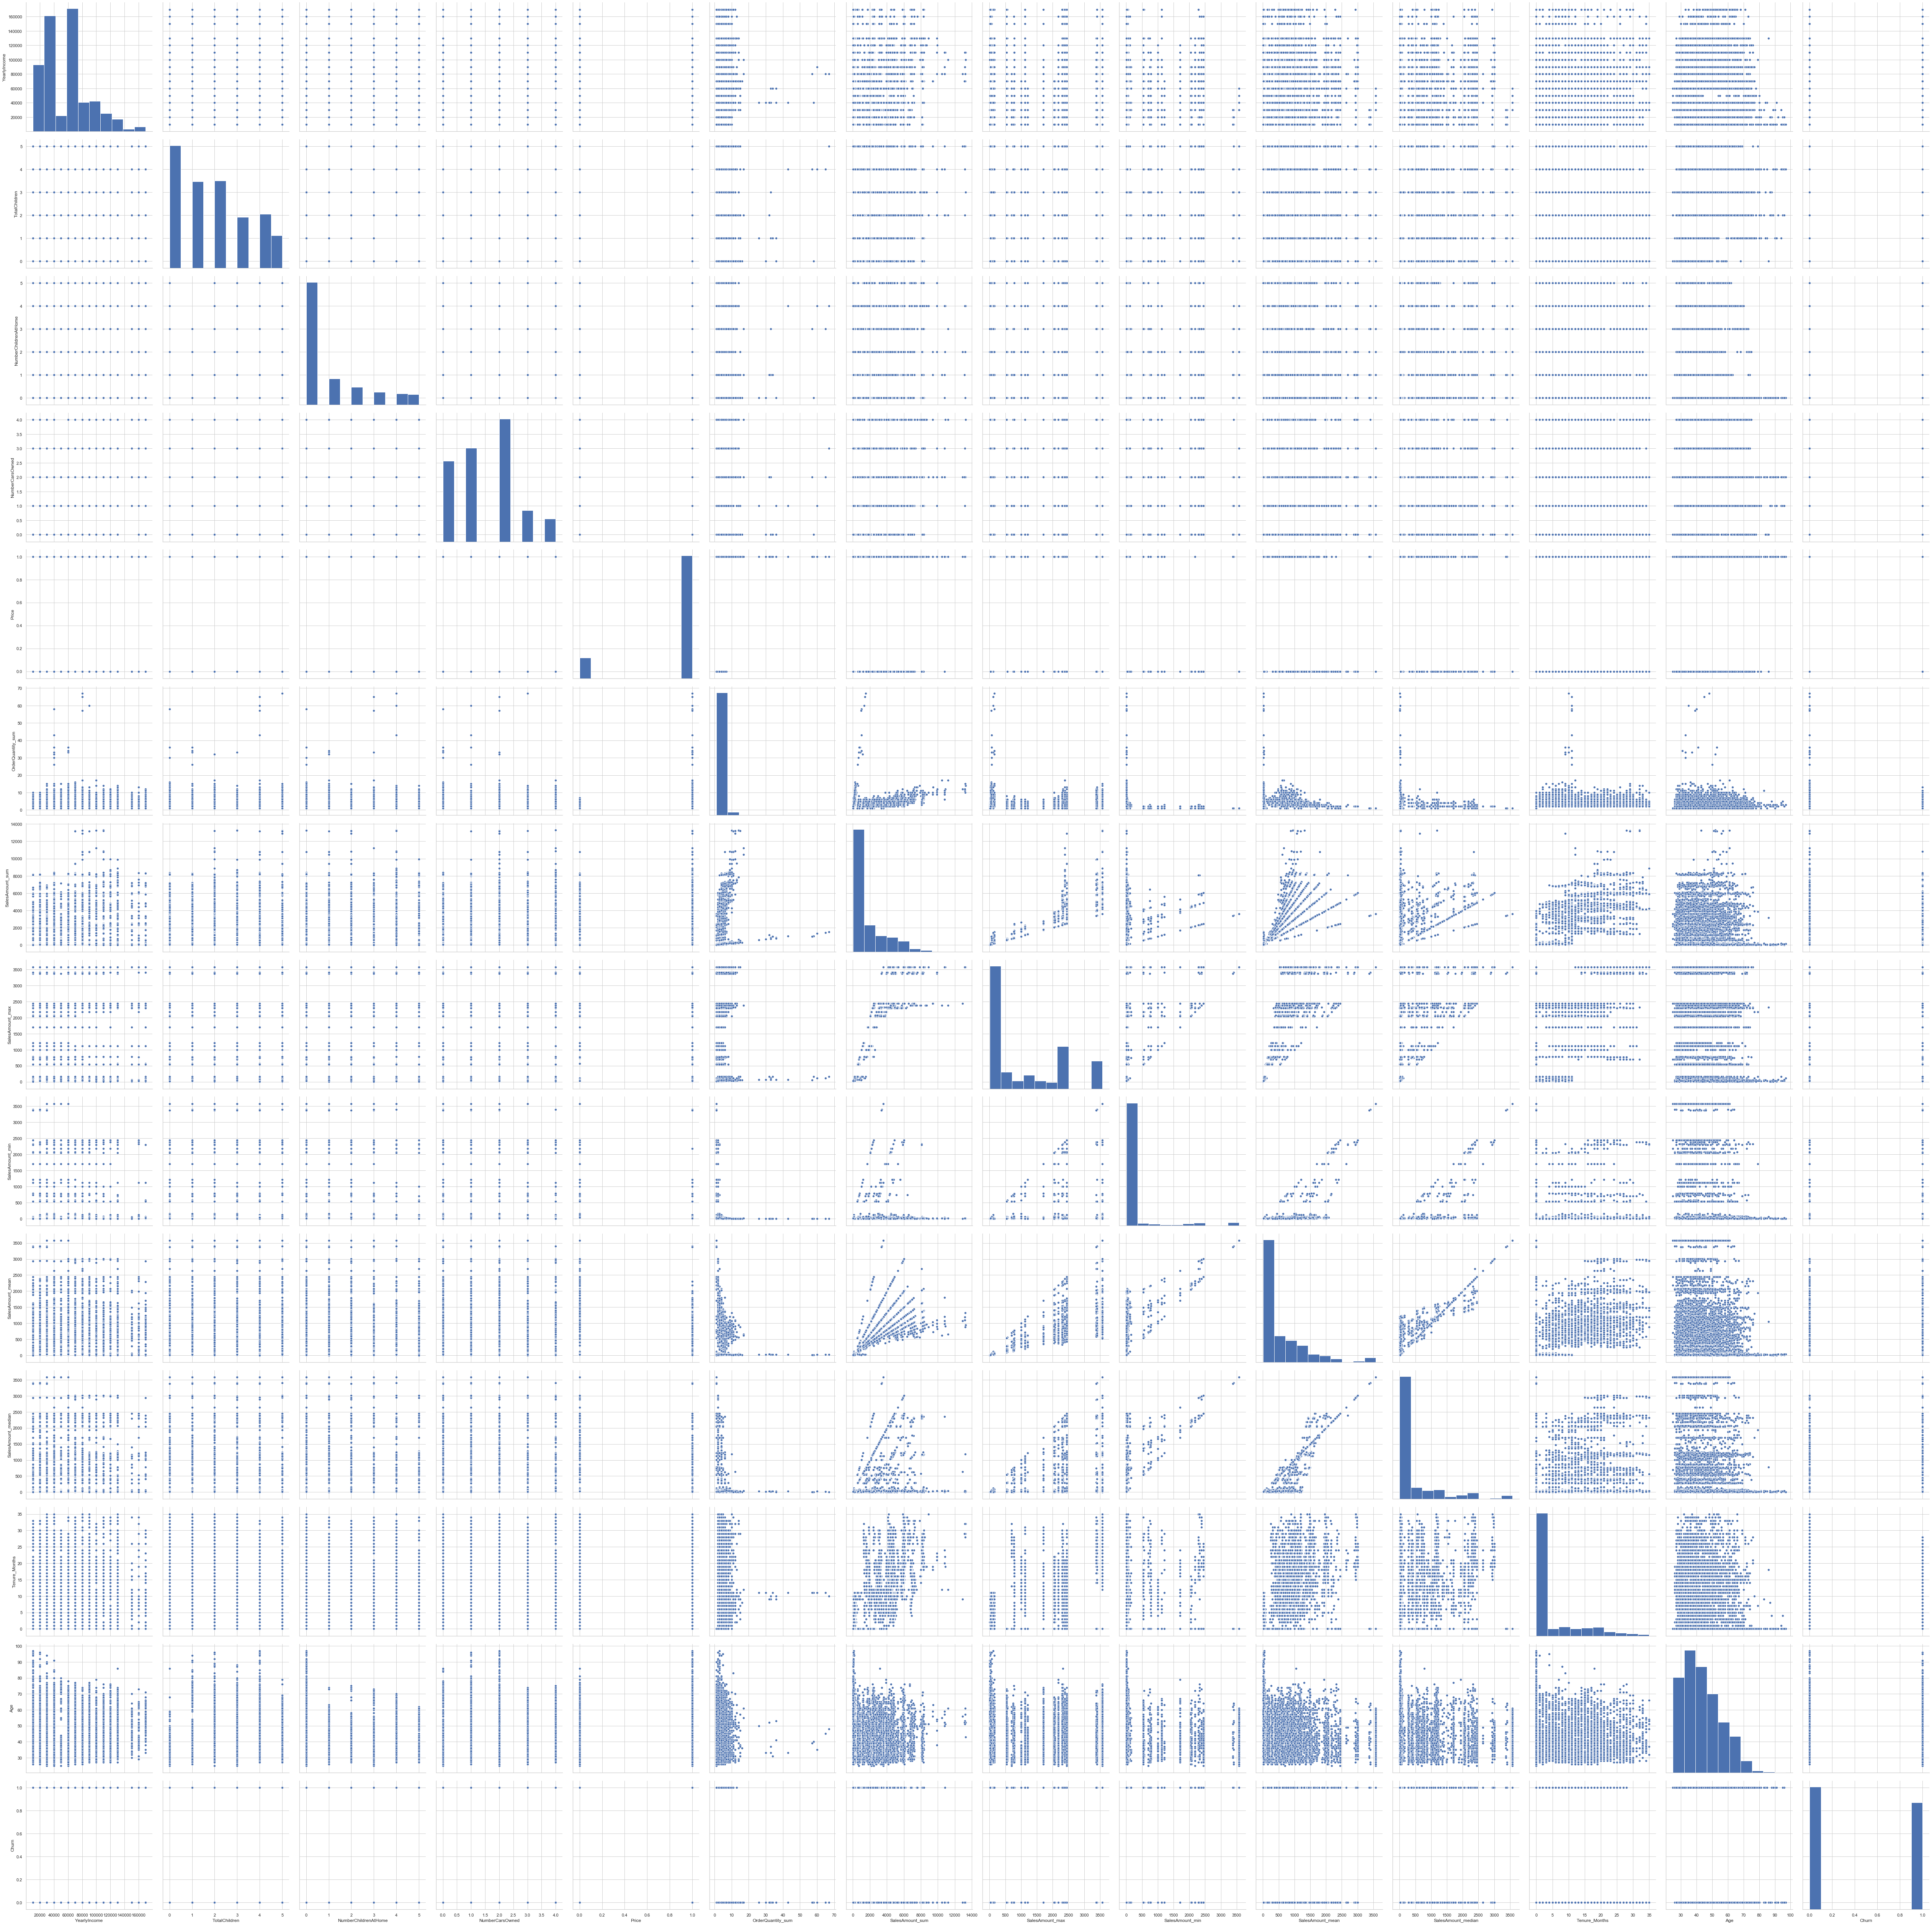

In [109]:
sns.pairplot(num_training_data, height=5)

In [110]:
num_training_data.columns.unique

<bound method Index.unique of Index(['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Price', 'OrderQuantity_sum', 'SalesAmount_sum',
       'SalesAmount_max', 'SalesAmount_min', 'SalesAmount_mean',
       'SalesAmount_median', 'Tenure_Months', 'Age', 'Churn'],
      dtype='object')>

In [111]:
num_training_data

YearlyIncome  TotalChildren  NumberChildrenAtHome  NumberCarsOwned  \
0           90000.0              2                     0                0   
1           60000.0              3                     3                1   
2           70000.0              0                     0                1   
3           80000.0              5                     5                4   
4           70000.0              0                     0                1   
...             ...            ...                   ...              ...   
12041       40000.0              1                     0                1   
12042       20000.0              1                     0                0   
12043       60000.0              2                     1                1   
12044      110000.0              3                     4                4   
12045       40000.0              2                     0                2   

       Price  OrderQuantity_sum  SalesAmount_sum  SalesAmount_max  \
0        1.0                  8          8248.99          3399.99   
1        0.0                  4          8114.04          3399.99   
2        1.0                  9          8139.29          3399.99   
3        1.0                  6          8196.01          3399.99   
4        1.0                  6          8121.33          3374.99   
...      ...                ...              ...              ...   
12041    1.0                 11           196.27            35.00   
12042    1.0                  2            38.98            34.99   
12043    1.0                  2            71.97            49.99   
12044    1.0                 10          7295.04          3578.27   
12045    1.0                  2            34.98            29.99   

       SalesAmount_min  SalesAmount_mean  SalesAmount_median  Tenure_Months  \
0                 4.99       1031.123750              44.490             27   
1                34.99       2028.510000            2339.530             25   
2                 2.29        904.365556               9.990             28   
3                21.98       1366.001667            1177.490             27   
4                 2.29       1353.555000            1177.495             28   
...                ...               ...                 ...            ...   
12041             2.29         17.842727               9.990              6   
12042             3.99         19.490000              19.490              0   
12043            21.98         35.985000              35.985              0   
12044             3.99        729.504000              34.990             31   
12045             4.99         17.490000              17.490              0   

       Age  Churn  
0       41      1  
1       42      1  
2       39      1  
3       33      1  
4       36      1  
...    ...    ...  
12041   51      0  
12042   72      0  
12043   53      0  
12044   56      0  
12045   69      0  

[12046 rows x 14 columns]

Plotting the relation of individual features against churners

Text(0, 0.5, 'Number of Customers')

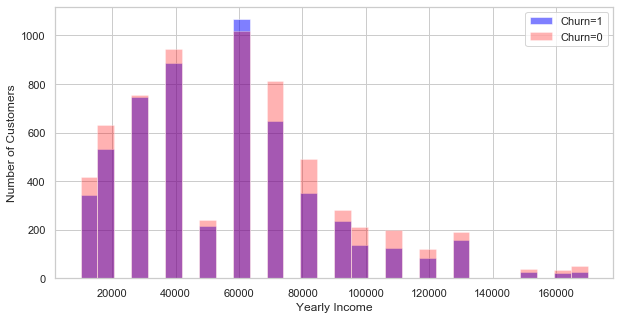

In [112]:
# Most of the churners earn between $40,000 and $70,000
# There is no significant variation 

plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['YearlyIncome'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['YearlyIncome'].hist(alpha=0.3,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('Yearly Income')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

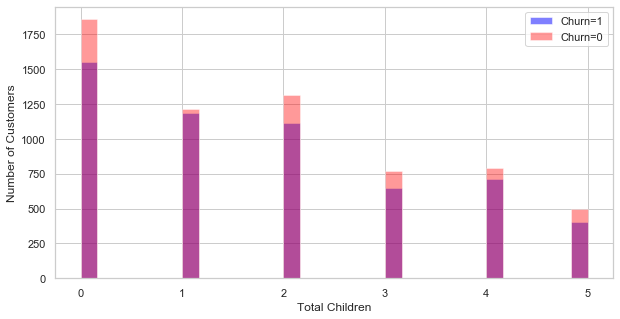

In [113]:
# Customers with 1 child show higher churn rate proportionately

plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['TotalChildren'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['TotalChildren'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('Total Children')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

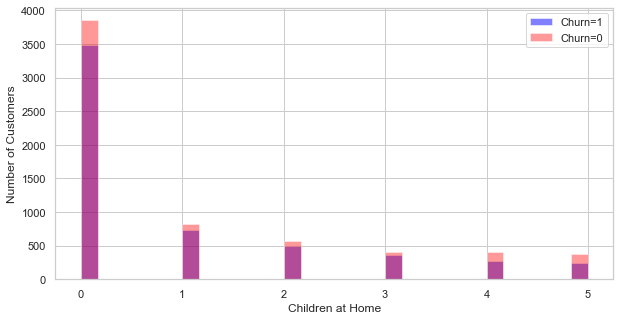

In [114]:
# Most of the churners have no children

plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['NumberChildrenAtHome'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['NumberChildrenAtHome'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('Children at Home')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

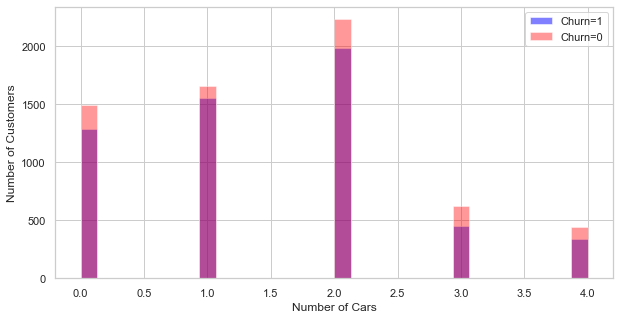

In [115]:
# No considerable impact
plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['NumberCarsOwned'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['NumberCarsOwned'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('Number of Cars')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

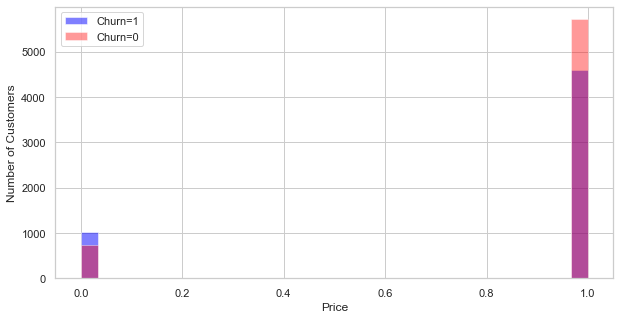

In [116]:
# No considerable impact

plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['Price'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['Price'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

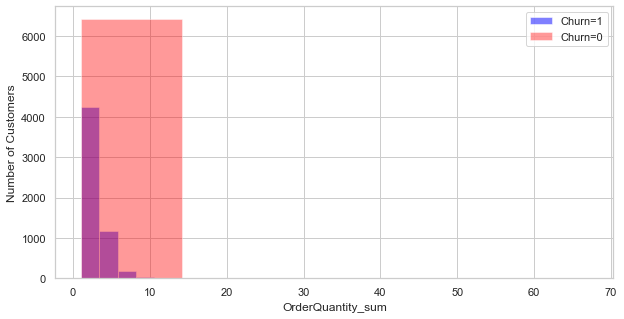

In [117]:
# No considerable impact

plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['OrderQuantity_sum'].hist(alpha=0.5,color='blue',bins=5,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['OrderQuantity_sum'].hist(alpha=0.4,color='red',bins=5,label='Churn=0')

plt.legend()
plt.xlabel('OrderQuantity_sum')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

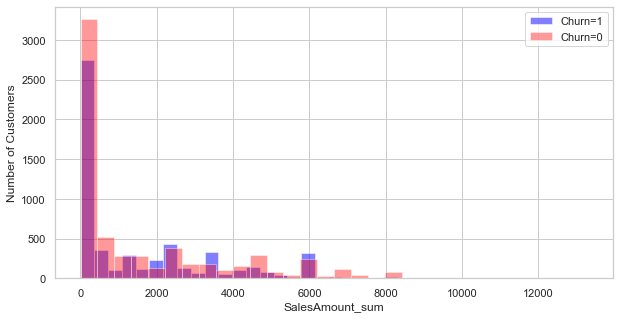

In [118]:
# No considerable impact

plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['SalesAmount_sum'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['SalesAmount_sum'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('SalesAmount_sum')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

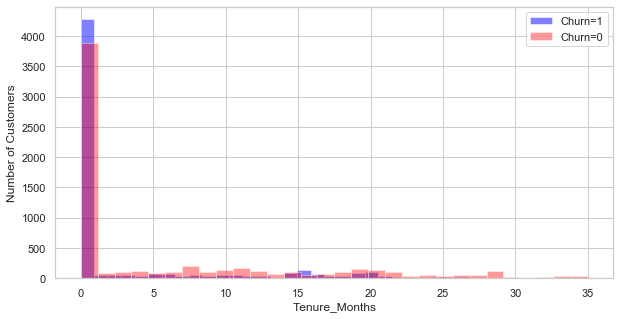

In [119]:
plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['Tenure_Months'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['Tenure_Months'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('Tenure_Months')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

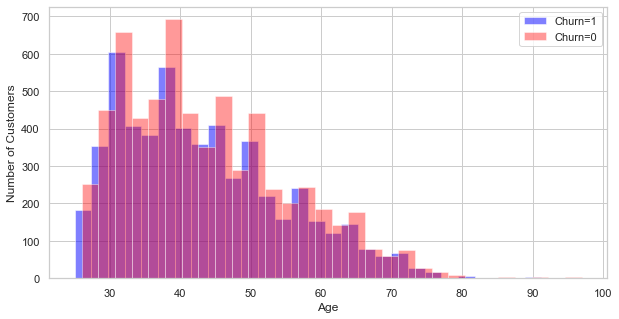

In [120]:
# Most of the churners are in age group of 30-40 years

plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['Age'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['Age'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

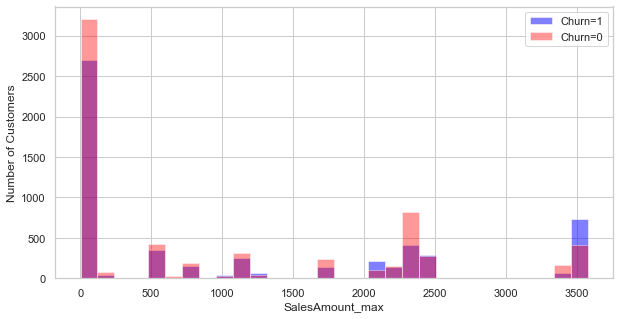

In [121]:
# The proportion of churners with sales amount of $3500 is high

plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['SalesAmount_max'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['SalesAmount_max'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('SalesAmount_max')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

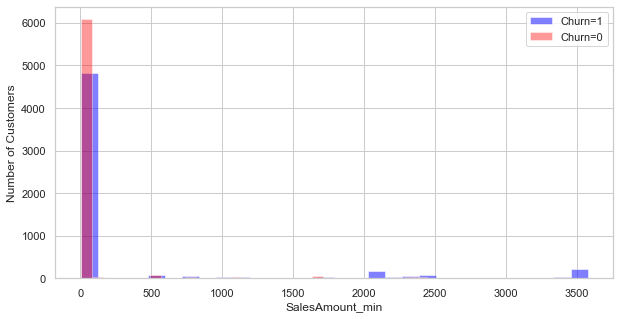

In [122]:
plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['SalesAmount_min'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['SalesAmount_min'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('SalesAmount_min')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

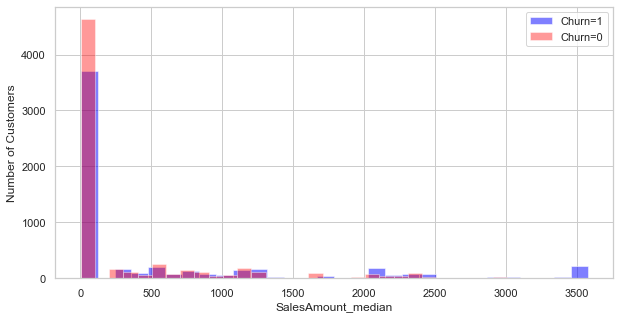

In [123]:
plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['SalesAmount_median'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['SalesAmount_median'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('SalesAmount_median')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

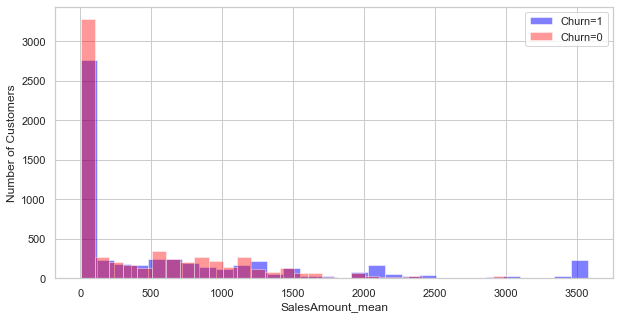

In [124]:
plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['SalesAmount_mean'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['SalesAmount_mean'].hist(alpha=0.4,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('SalesAmount_mean')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

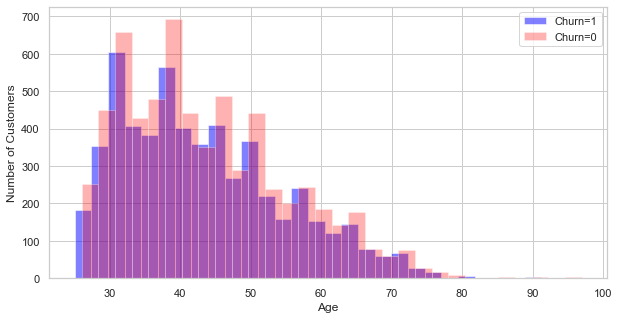

In [125]:
plt.figure(figsize=(10,5))
num_training_data[num_training_data['Churn']==1]['Age'].hist(alpha=0.5,color='blue',bins=30,label='Churn=1')
num_training_data[num_training_data['Churn']==0]['Age'].hist(alpha=0.3,color='red',bins=30,label='Churn=0')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of Customers')

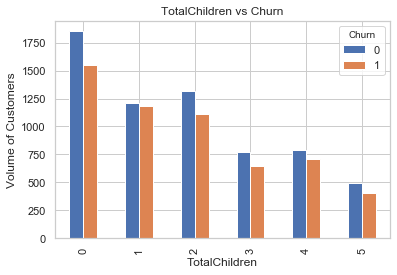

In [126]:
#No of children does not seem to be a good predictor of the outcome variable.
pd.crosstab(num_training_data.TotalChildren,num_training_data.Churn).plot(kind='bar')
plt.title('TotalChildren vs Churn')
plt.xlabel('TotalChildren')
plt.ylabel('Volume of Customers')
plt.savefig('pur_fre_pout_bar')

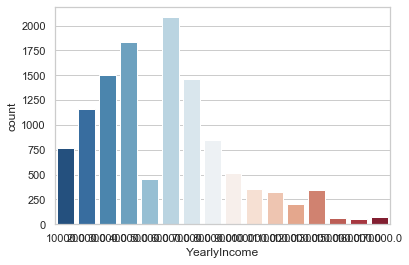

In [127]:
sns.set_style('whitegrid')
sns.countplot(x='YearlyIncome',data=num_training_data,palette='RdBu_r')

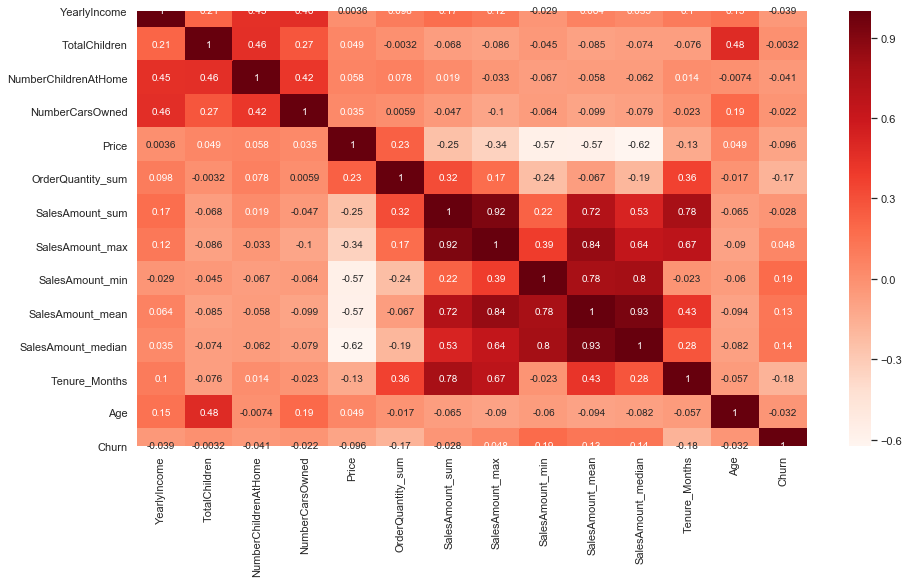

In [128]:
#Plotting the correlation heatmap
#Using Pearson's Correlation
#The darker the colour, the higher the correlation

plt.figure(figsize=(15,8))
cor=num_training_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [129]:
#Use corr() method from pandas to find the correlation between all the features.
#Check and remove all those features whose correlation is more than the set threshold value

correlated_features = set()
correlation_matrix = num_training_data.corr()

In [130]:
#Now loop through the correlation matrix to check for features which are higher than threshold value

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [131]:
print(len(correlated_features))
print(correlated_features)

4
{'SalesAmount_max', 'SalesAmount_median', 'SalesAmount_mean', 'Tenure_Months'}


In [132]:
#Four features whose correlation is more than 0.7 and can be removed.

num_training_data = num_training_data.drop(columns=['SalesAmount_median','SalesAmount_mean',
                                                    'SalesAmount_max','Tenure_Months'], axis=1)

In [133]:
num_training_data.columns.unique

<bound method Index.unique of Index(['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Price', 'OrderQuantity_sum', 'SalesAmount_sum',
       'SalesAmount_min', 'Age', 'Churn'],
      dtype='object')>

# Now we will be dealing with Categorical Variables

*
Categorical variables are stored in cat_features dataframe.
Employ Chi Square test to find best categorical features.

In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(cat_features.abs(), labels)

In [135]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=cat_features.columns)

In [136]:
chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=False)

index  Chi_Square
12  EnglishOccupation_Skilled Manual       16.36
9       EnglishOccupation_Management        6.51
16         CommuteDistance_1-2 Miles        5.46
18         CommuteDistance_2-5 Miles        4.40
17         CommuteDistance_10+ Miles        4.24
11    EnglishOccupation_Professional        2.22
13                  HouseOwnerFlag_0        2.13
4         EnglishEducation_Bachelors        1.91
1                    MaritalStatus_S        1.73
15         CommuteDistance_0-1 Miles        1.65
0                    MaritalStatus_M        1.48
6       EnglishEducation_High School        1.33
14                  HouseOwnerFlag_1        1.03
19        CommuteDistance_5-10 Miles        0.79
8         EnglishOccupation_Clerical        0.58
5   EnglishEducation_Graduate Degree        0.44
7   EnglishEducation_Partial College        0.27
2                           Gender_F        0.20
3                           Gender_M        0.20
10          EnglishOccupation_Manual        0.11

In [137]:
#Select top 11 categorical features

final_categorical_features = cat_features[['EnglishOccupation_Skilled Manual','CommuteDistance_1-2 Miles','CommuteDistance_2-5 Miles',
                            'EnglishOccupation_Professional','MaritalStatus_S','CommuteDistance_10+ Miles',
                              'EnglishEducation_Graduate Degree','HouseOwnerFlag_0','MaritalStatus_M',
                              'CommuteDistance_5-10 Miles','EnglishOccupation_Management']]

In [138]:
#Combine the final numerical variables with categorical variables

final_training_data = pd.concat([final_categorical_features, num_training_data], axis=1)

In [139]:
#Final list of variables obtained via feature reduction:

final_training_data.columns.tolist()

['EnglishOccupation_Skilled Manual',
 'CommuteDistance_1-2 Miles',
 'CommuteDistance_2-5 Miles',
 'EnglishOccupation_Professional',
 'MaritalStatus_S',
 'CommuteDistance_10+ Miles',
 'EnglishEducation_Graduate Degree',
 'HouseOwnerFlag_0',
 'MaritalStatus_M',
 'CommuteDistance_5-10 Miles',
 'EnglishOccupation_Management',
 'YearlyIncome',
 'TotalChildren',
 'NumberChildrenAtHome',
 'NumberCarsOwned',
 'Price',
 'OrderQuantity_sum',
 'SalesAmount_sum',
 'SalesAmount_min',
 'Age',
 'Churn']

# Step Forward Feature Selection

Step Forward Feature Selection only works with numerical variables. 
Steps to follow:
Separate the numeric variables.
Remove those variable which has correlation of 0.8 or higher.
Divide the data into train and test

In [140]:
forward_features = training_data.drop(columns=['Churn'], axis=1)
labels = training_data['Churn']

In [141]:
forward_features.dtypes

CustomerKey                                      int64
BirthDate                                       object
YearlyIncome                                   float64
TotalChildren                                    int64
NumberChildrenAtHome                             int64
NumberCarsOwned                                  int64
DateFirstPurchase                               object
MaritalStatus_M                                  uint8
MaritalStatus_S                                  uint8
Gender_F                                         uint8
Gender_M                                         uint8
EnglishEducation_Bachelors                       uint8
EnglishEducation_Graduate Degree                 uint8
EnglishEducation_High School                     uint8
EnglishEducation_Partial College                 uint8
EnglishEducation_Partial High School             uint8
EnglishOccupation_Clerical                       uint8
EnglishOccupation_Management                     uint8
EnglishOcc

In [142]:
num_columns = ['int32', 'int64','float64']
numerical_columns = list(forward_features.select_dtypes(include=num_columns).columns)
forward_features = forward_features[numerical_columns]
forward_features.shape

(12046, 24)

In [143]:
#Identify missing values
forward_features.isnull().mean().sort_values(ascending=False)*100

Television  Advertisement   8.35
Manufacturer                8.35
On Promotion                8.35
Other                       8.35
Price                       8.35
Quality                     8.35
Review                      8.35
Tenure_Months               0.00
YearlyIncome                0.00
TotalChildren               0.00
NumberChildrenAtHome        0.00
NumberCarsOwned             0.00
Age                         0.00
OrderQuantity_sum           0.00
OrderQuantity_max           0.00
OrderQuantity_min           0.00
OrderQuantity_mean          0.00
OrderQuantity_median        0.00
SalesAmount_sum             0.00
SalesAmount_max             0.00
SalesAmount_min             0.00
SalesAmount_mean            0.00
SalesAmount_median          0.00
CustomerKey                 0.00
dtype: float64

In [144]:
#Replace missing values
forward_features = forward_features.fillna(forward_features.mode().iloc[0])

In [145]:
correlated_features = set()
correlation_matrix = forward_features.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [146]:
print(correlated_features)

{'SalesAmount_max', 'Tenure_Months', 'SalesAmount_median', 'SalesAmount_mean', 'Quality'}


In [147]:
#Drop highly correlated fetaures 
forward_features = forward_features.drop((correlated_features),axis=1)

In [148]:
#Shape
forward_features.shape

(12046, 19)

In [149]:
#Unique values/attributes
forward_features.columns.unique

<bound method Index.unique of Index(['CustomerKey', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Manufacturer', 'On Promotion', 'Other', 'Price',
       'Review', 'Television  Advertisement', 'OrderQuantity_sum',
       'OrderQuantity_max', 'OrderQuantity_min', 'OrderQuantity_mean',
       'OrderQuantity_median', 'SalesAmount_sum', 'SalesAmount_min', 'Age'],
      dtype='object')>

In [150]:
#Dropping CustomerKey column since it has no impact
forward_features = forward_features.drop(columns=['CustomerKey'], axis=1)

In [151]:
#Unique values/attributes
forward_features.columns.unique

<bound method Index.unique of Index(['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Manufacturer', 'On Promotion', 'Other', 'Price',
       'Review', 'Television  Advertisement', 'OrderQuantity_sum',
       'OrderQuantity_max', 'OrderQuantity_min', 'OrderQuantity_mean',
       'OrderQuantity_median', 'SalesAmount_sum', 'SalesAmount_min', 'Age'],
      dtype='object')>

In [152]:
import sys
!{sys.executable} -m pip install mlxtend

In [153]:
#Utilise feature selection feature from mlxtend library

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector

In [154]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(),
           k_features=15,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [155]:
# forward_features needs to be split once again since we have dropped few columns from it earlier

train_features, test_features, train_labels, test_labels = train_test_split(forward_features, labels, test_size=0.2,random_state=39)

In [156]:
forward_features1 = feature_selector.fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarn

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

In [157]:
# Print out the list of filtered features
forward_filtered_features = train_features.columns[list(forward_features1.k_feature_idx_)]
forward_filtered_features

Index(['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Manufacturer', 'Other', 'Review',
       'Television  Advertisement', 'OrderQuantity_sum', 'OrderQuantity_min',
       'OrderQuantity_mean', 'OrderQuantity_median', 'SalesAmount_sum',
       'SalesAmount_min', 'Age'],
      dtype='object')

In [158]:
# To check the performance of our selected features, we will perform the following:

clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_features[forward_filtered_features].fillna(0), train_labels)

train_pred = clf.predict_proba(train_features[forward_filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

test_pred = clf.predict_proba(test_features[forward_filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))

#The accurace of training is higher than the test sets 
#It is more accurate with training data, which means that it is overfitting

Accuracy on training set: 0.6490639246974299
Accuracy on test set: 0.6315351675595083


# Exhaustive Feature Selection
The performance of a machine learning algorithm is evaluated against all possible combinations of the features in the dataset. 
The feature subset that yields best performance is selected. 
The exhaustive search algorithm is the most greedy algorithm of all the wrapper methods since it tries all the combination of features and selects the best

In [159]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                             min_features=2,
                                             max_features=4,
                                             scoring='roc_auc',
                                             print_progress=True,
                                             cv=2)

In [160]:
exhaustive_features = training_data.drop(columns=['Churn'], axis=1)
labels = training_data['Churn']

In [161]:
#Unique values/attributes
exhaustive_features.columns.unique

<bound method Index.unique of Index(['CustomerKey', 'BirthDate', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'NumberCarsOwned', 'DateFirstPurchase',
       'MaritalStatus_M', 'MaritalStatus_S', 'Gender_F', 'Gender_M',
       'EnglishEducation_Bachelors', 'EnglishEducation_Graduate Degree',
       'EnglishEducation_High School', 'EnglishEducation_Partial College',
       'EnglishEducation_Partial High School', 'EnglishOccupation_Clerical',
       'EnglishOccupation_Management', 'EnglishOccupation_Manual',
       'EnglishOccupation_Professional', 'EnglishOccupation_Skilled Manual',
       'HouseOwnerFlag_0', 'HouseOwnerFlag_1', 'CommuteDistance_0-1 Miles',
       'CommuteDistance_1-2 Miles', 'CommuteDistance_10+ Miles',
       'CommuteDistance_2-5 Miles', 'CommuteDistance_5-10 Miles',
       'Manufacturer', 'On Promotion', 'Other', 'Price', 'Quality', 'Review',
       'Television  Advertisement', 'OrderQuantity_sum', 'OrderQuantity_max',
       'OrderQuantity_min', 'O

In [162]:
#Drop CustomerKey
exhaustive_features = exhaustive_features.drop(columns=['CustomerKey'],axis=1)

In [166]:
train_features, test_features, train_labels, test_labels = train_test_split(exhaustive_features,labels,test_size=0.2,random_state=39)

In [170]:
exhaustive_features1 = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

KeyboardInterrupt: 

In [172]:
#There's an error which says that datetime features can not be dealt with so we need to remove those.

exhaustive_features = exhaustive_features.drop(columns=['BirthDate','DateFirstPurchase','OrderDate_max',
                                         'Last_Purchase_Date', 'Cutoff_Date'],axis=1)

KeyError: "['BirthDate' 'DateFirstPurchase' 'OrderDate_max' 'Last_Purchase_Date'\n 'Cutoff_Date'] not found in axis"

In [173]:
# We will have to split the data again as we have changed exh_features

train_features, test_features, train_labels, test_labels = train_test_split(exhaustive_features,labels,test_size=0.2,random_state=39)

In [ ]:
# The code to check the accuracy of the Exhautive Feature Selection

# clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
# clf.fit(train_features[exh_features1].fillna(0), train_labels)

# train_pred = clf.predict_proba(train_features[exh_features1].fillna(0))
# print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

# test_pred = clf.predict_proba(test_features[exh_features1].fillna(0))
# print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))

# Vote based Approach

Reference: https://medium.com/@sundarstyles89/variable-selection-using-python-vote-based-approach-faa42da960f0

We can try different feature selection methods and subject them to voting. 

In [174]:
# Re-run following code to avoid duplicated variables and wrong information

dbo_DC3['Churn'].value_counts()

#Separate churners from non-churners

churners = dbo_DC3.loc[dbo_DC3['Churn']==1]
non_churners = dbo_DC3.loc[dbo_DC3['Churn']==0]

print(churners['Churn'].value_counts()) 
print(non_churners['Churn'].value_counts())

#Split non_churners into half so that we hold out sample data.
#Utilise train_test_split to randomly separate the data

from sklearn.model_selection import train_test_split

sample_data, non_churners_data = train_test_split(non_churners, test_size=0.5, random_state=43)

print(sample_data['Churn'].value_counts())
print(non_churners_data['Churn'].value_counts())

#Combine non_churners_data with non_churners. It will be our training data

training_data = pd.concat([churners, non_churners_data], ignore_index=True)

training_data['Churn'].value_counts()

1    5608
Name: Churn, dtype: int64
0    12876
Name: Churn, dtype: int64
0    6438
Name: Churn, dtype: int64
0    6438
Name: Churn, dtype: int64


0    6438
1    5608
Name: Churn, dtype: int64

In [175]:
#training set data information
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12046 entries, 0 to 12045
Data columns (total 51 columns):
CustomerKey                             12046 non-null int64
BirthDate                               12046 non-null object
YearlyIncome                            12046 non-null float64
TotalChildren                           12046 non-null int64
NumberChildrenAtHome                    12046 non-null int64
NumberCarsOwned                         12046 non-null int64
DateFirstPurchase                       12046 non-null object
MaritalStatus_M                         12046 non-null uint8
MaritalStatus_S                         12046 non-null uint8
Gender_F                                12046 non-null uint8
Gender_M                                12046 non-null uint8
EnglishEducation_Bachelors              12046 non-null uint8
EnglishEducation_Graduate Degree        12046 non-null uint8
EnglishEducation_High School            12046 non-null uint8
EnglishEducation_Partial College 

In [176]:
#Drop the attributes within the brackets
training_data = training_data.drop(columns=['CustomerKey','BirthDate','DateFirstPurchase','OrderDate_max',
                                           'Last_Purchase_Date','Cutoff_Date'],axis=1)

In [177]:
#Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict

d = defaultdict(preprocessing.LabelEncoder)

#Encoding the categorical variable

fit = training_data.select_dtypes(include=['uint8']).apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    training_data[i] = d[i].transform(training_data[i])

In [178]:
#Training data top records
training_data.head()

YearlyIncome  TotalChildren  NumberChildrenAtHome  NumberCarsOwned  \
0      90000.00              2                     0                0   
1      60000.00              3                     3                1   
2      70000.00              0                     0                1   
3      80000.00              5                     5                4   
4      70000.00              0                     0                1   

   MaritalStatus_M  MaritalStatus_S  Gender_F  Gender_M  \
0                1                0         0         1   
1                1                0         0         1   
2                0                1         1         0   
3                0                1         1         0   
4                0                1         0         1   

   EnglishEducation_Bachelors  EnglishEducation_Graduate Degree  ...  \
0                           1                                 0  ...   
1                           1                                 0  ...   
2                           1                                 0  ...   
3                           1                                 0  ...   
4                           1                                 0  ...   

   OrderQuantity_mean  OrderQuantity_median  SalesAmount_sum  SalesAmount_max  \
0                   1                     1          8248.99          3399.99   
1                   1                     1          8114.04          3399.99   
2                   1                     1          8139.29          3399.99   
3                   1                     1          8196.01          3399.99   
4                   1                     1          8121.33          3374.99   

   SalesAmount_min  SalesAmount_mean  SalesAmount_median  Tenure_Months  Age  \
0             4.99           1031.12               44.49             27   41   
1            34.99           2028.51             2339.53             25   42   
2             2.29            904.37                9.99             28   39   
3            21.98           1366.00             1177.49             27   33   
4             2.29           1353.56             1177.49             28   36   

   Churn  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 45 columns]

In [179]:
#Drop the attributes in the bracket
features = training_data.drop(columns=['Churn'],axis=1)
labels = training_data['Churn']

In [180]:
#Shape
features.shape

(12046, 44)

In [181]:
# Find missing values
features.isnull().mean().sort_values(ascending=False)*100

Television  Advertisement              8.35
Review                                 8.35
Manufacturer                           8.35
On Promotion                           8.35
Other                                  8.35
Price                                  8.35
Quality                                8.35
EnglishOccupation_Manual               0.00
EnglishOccupation_Management           0.00
EnglishOccupation_Clerical             0.00
EnglishEducation_Partial High School   0.00
EnglishEducation_Partial College       0.00
Age                                    0.00
EnglishOccupation_Skilled Manual       0.00
EnglishEducation_High School           0.00
EnglishEducation_Graduate Degree       0.00
EnglishEducation_Bachelors             0.00
Gender_M                               0.00
Gender_F                               0.00
MaritalStatus_S                        0.00
MaritalStatus_M                        0.00
NumberCarsOwned                        0.00
NumberChildrenAtHome            

In [182]:
#Replace missing values
features = features.fillna(features.mode().iloc[0])

# Various Variable Selection Methods

# Weight of Evidence and Information Value

In [183]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
        
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [184]:
final_iv, IV = data_vars(features, labels)

In [185]:
IV = IV.rename(columns={'VAR_NAME':'index'})

In [186]:
IV.sort_values(['IV'],ascending=0)

index   IV
41                         Tenure_Months 0.13
30                     OrderQuantity_sum 0.13
33                               Quality 0.05
20                          Manufacturer 0.04
32                                 Price 0.04
38                       SalesAmount_min 0.03
43                          YearlyIncome 0.01
40             Television  Advertisement 0.01
15      EnglishOccupation_Skilled Manual 0.01
37                    SalesAmount_median 0.01
23                       NumberCarsOwned 0.00
31                                 Other 0.00
24                  NumberChildrenAtHome 0.00
0                                    Age 0.00
35                       SalesAmount_max 0.00
12          EnglishOccupation_Management 0.00
2              CommuteDistance_1-2 Miles 0.00
25                          On Promotion 0.00
4              CommuteDistance_2-5 Miles 0.00
3              CommuteDistance_10+ Miles 0.00
36                      SalesAmount_mean 0.00
39                       SalesAmount_sum 0.00
22                       MaritalStatus_S 0.00
21                       MaritalStatus_M 0.00
18                      HouseOwnerFlag_0 0.00
19                      HouseOwnerFlag_1 0.00
14        EnglishOccupation_Professional 0.00
6             EnglishEducation_Bachelors 0.00
1              CommuteDistance_0-1 Miles 0.00
34                                Review 0.00
8           EnglishEducation_High School 0.00
5             CommuteDistance_5-10 Miles 0.00
10  EnglishEducation_Partial High School 0.00
11            EnglishOccupation_Clerical 0.00
7       EnglishEducation_Graduate Degree 0.00
16                              Gender_F 0.00
17                              Gender_M 0.00
42                         TotalChildren 0.00
9       EnglishEducation_Partial College 0.00
13              EnglishOccupation_Manual 0.00
27                    OrderQuantity_mean 0.00
26                     OrderQuantity_max 0.00
28                  OrderQuantity_median 0.00
29                     OrderQuantity_min 0.00

# Variable Importance using Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9812385854225469


In [188]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

index   RF
37                       SalesAmount_sum 0.10
43                                   Age 0.10
40                      SalesAmount_mean 0.09
42                         Tenure_Months 0.08
41                    SalesAmount_median 0.07
38                       SalesAmount_max 0.06
0                           YearlyIncome 0.06
39                       SalesAmount_min 0.05
32                     OrderQuantity_sum 0.04
1                          TotalChildren 0.04
3                        NumberCarsOwned 0.03
2                   NumberChildrenAtHome 0.03
7                               Gender_M 0.01
6                               Gender_F 0.01
11      EnglishEducation_Partial College 0.01
20             CommuteDistance_0-1 Miles 0.01
21             CommuteDistance_1-2 Miles 0.01
8             EnglishEducation_Bachelors 0.01
5                        MaritalStatus_S 0.01
16        EnglishOccupation_Professional 0.01
19                      HouseOwnerFlag_1 0.01
4                        MaritalStatus_M 0.01
24            CommuteDistance_5-10 Miles 0.01
18                      HouseOwnerFlag_0 0.01
9       EnglishEducation_Graduate Degree 0.01
13            EnglishOccupation_Clerical 0.01
23             CommuteDistance_2-5 Miles 0.01
17      EnglishOccupation_Skilled Manual 0.01
10          EnglishEducation_High School 0.01
22             CommuteDistance_10+ Miles 0.01
14          EnglishOccupation_Management 0.01
26                          On Promotion 0.01
12  EnglishEducation_Partial High School 0.01
15              EnglishOccupation_Manual 0.01
27                                 Other 0.01
28                                 Price 0.00
29                               Quality 0.00
30                                Review 0.00
25                          Manufacturer 0.00
31             Television  Advertisement 0.00
33                     OrderQuantity_max 0.00
34                     OrderQuantity_min 0.00
35                    OrderQuantity_mean 0.00
36                  OrderQuantity_median 0.00

In [189]:
labels.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Churn, dtype: int32

# Recursive Feature Elimination (Wrapper Method)

In [190]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [191]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [192]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()
Selected[Selected['RFE'] == True]

index   RFE
5                    MaritalStatus_S  True
8         EnglishEducation_Bachelors  True
14      EnglishOccupation_Management  True
17  EnglishOccupation_Skilled Manual  True
18                  HouseOwnerFlag_0  True
19                  HouseOwnerFlag_1  True
21         CommuteDistance_1-2 Miles  True
25                      Manufacturer  True
26                      On Promotion  True
27                             Other  True
28                             Price  True
29                           Quality  True
30                            Review  True
31         Television  Advertisement  True
32                 OrderQuantity_sum  True
33                 OrderQuantity_max  True
34                 OrderQuantity_min  True
35                OrderQuantity_mean  True
36              OrderQuantity_median  True
42                     Tenure_Months  True

In [193]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [194]:
Selected[Selected['RFE'] == True]

index   RFE
5                    MaritalStatus_S  True
8         EnglishEducation_Bachelors  True
14      EnglishOccupation_Management  True
17  EnglishOccupation_Skilled Manual  True
18                  HouseOwnerFlag_0  True
19                  HouseOwnerFlag_1  True
21         CommuteDistance_1-2 Miles  True
25                      Manufacturer  True
26                      On Promotion  True
27                             Other  True
28                             Price  True
29                           Quality  True
30                            Review  True
31         Television  Advertisement  True
32                 OrderQuantity_sum  True
33                 OrderQuantity_max  True
34                 OrderQuantity_min  True
35                OrderQuantity_mean  True
36              OrderQuantity_median  True
42                     Tenure_Months  True

# Extratrees Classifier

In [195]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05018174 0.04022198 0.02922849 0.03298865 0.01430106 0.0138246
 0.01724288 0.01776828 0.01242914 0.01020483 0.00938327 0.01311996
 0.00589538 0.00807929 0.00897081 0.00637746 0.01004448 0.01023776
 0.01129578 0.01201647 0.01219227 0.01139977 0.00710883 0.01113758
 0.01019861 0.00507829 0.01290302 0.0094159  0.00762278 0.00577425
 0.0051007  0.00294521 0.05305697 0.         0.         0.
 0.         0.07345771 0.06796112 0.06905496 0.0752885  0.0702413
 0.0708569  0.08539301]


In [196]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0)

index  Extratrees
43                                   Age        0.09
40                      SalesAmount_mean        0.08
37                       SalesAmount_sum        0.07
42                         Tenure_Months        0.07
41                    SalesAmount_median        0.07
39                       SalesAmount_min        0.07
38                       SalesAmount_max        0.07
32                     OrderQuantity_sum        0.05
0                           YearlyIncome        0.05
1                          TotalChildren        0.04
3                        NumberCarsOwned        0.03
2                   NumberChildrenAtHome        0.03
7                               Gender_M        0.02
6                               Gender_F        0.02
4                        MaritalStatus_M        0.01
5                        MaritalStatus_S        0.01
11      EnglishEducation_Partial College        0.01
26                          On Promotion        0.01
8             EnglishEducation_Bachelors        0.01
20             CommuteDistance_0-1 Miles        0.01
19                      HouseOwnerFlag_1        0.01
21             CommuteDistance_1-2 Miles        0.01
18                      HouseOwnerFlag_0        0.01
23             CommuteDistance_2-5 Miles        0.01
17      EnglishOccupation_Skilled Manual        0.01
9       EnglishEducation_Graduate Degree        0.01
24            CommuteDistance_5-10 Miles        0.01
16        EnglishOccupation_Professional        0.01
27                                 Other        0.01
10          EnglishEducation_High School        0.01
14          EnglishOccupation_Management        0.01
13            EnglishOccupation_Clerical        0.01
28                                 Price        0.01
22             CommuteDistance_10+ Miles        0.01
15              EnglishOccupation_Manual        0.01
12  EnglishEducation_Partial High School        0.01
29                               Quality        0.01
30                                Review        0.01
25                          Manufacturer        0.01
31             Television  Advertisement        0.00
34                     OrderQuantity_min        0.00
33                     OrderQuantity_max        0.00
36                  OrderQuantity_median        0.00
35                    OrderQuantity_mean        0.00

# Chi Square (Feature Reduction Method)

In [197]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features, labels)

In [198]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)
chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0)

index  Chi_Square
39                       SalesAmount_min   924811.00
0                           YearlyIncome   338152.35
41                    SalesAmount_median   326576.62
40                      SalesAmount_mean   220768.21
38                       SalesAmount_max    41483.76
37                       SalesAmount_sum    25095.01
42                         Tenure_Months     5283.78
32                     OrderQuantity_sum      610.05
29                               Quality      138.30
25                          Manufacturer      117.23
2                   NumberChildrenAtHome       46.17
43                                   Age       39.37
31             Television  Advertisement       28.09
17      EnglishOccupation_Skilled Manual       16.36
28                                 Price       16.16
27                                 Other       11.82
14          EnglishOccupation_Management        6.51
21             CommuteDistance_1-2 Miles        5.46
26                          On Promotion        5.12
3                        NumberCarsOwned        4.87
23             CommuteDistance_2-5 Miles        4.40
22             CommuteDistance_10+ Miles        4.24
16        EnglishOccupation_Professional        2.22
18                      HouseOwnerFlag_0        2.13
30                                Review        2.03
8             EnglishEducation_Bachelors        1.91
5                        MaritalStatus_S        1.73
20             CommuteDistance_0-1 Miles        1.65
4                        MaritalStatus_M        1.48
10          EnglishEducation_High School        1.33
19                      HouseOwnerFlag_1        1.03
24            CommuteDistance_5-10 Miles        0.79
12  EnglishEducation_Partial High School        0.73
13            EnglishOccupation_Clerical        0.58
9       EnglishEducation_Graduate Degree        0.44
11      EnglishEducation_Partial College        0.27
6                               Gender_F        0.20
7                               Gender_M        0.20
1                          TotalChildren        0.17
15              EnglishOccupation_Manual        0.11
36                  OrderQuantity_median        0.00
35                    OrderQuantity_mean        0.00
34                     OrderQuantity_min        0.00
33                     OrderQuantity_max        0.00

# L1 Feature Selection (Embedded Method)

In [199]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [200]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()
l1[l1['L1'] == True]

index    L1
1                      TotalChildren  True
2               NumberChildrenAtHome  True
3                    NumberCarsOwned  True
17  EnglishOccupation_Skilled Manual  True
28                             Price  True
29                           Quality  True
31         Television  Advertisement  True
32                 OrderQuantity_sum  True
33                 OrderQuantity_max  True
34                 OrderQuantity_min  True
35                OrderQuantity_mean  True
36              OrderQuantity_median  True
37                   SalesAmount_sum  True
38                   SalesAmount_max  True
39                   SalesAmount_min  True
40                  SalesAmount_mean  True
41                SalesAmount_median  True
42                     Tenure_Months  True
43                               Age  True

# Combining all together

In [201]:
from functools import reduce

dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)
final_results.head()

index   IV   RF    RFE  Extratrees  Chi_Square     L1
0                        Age 0.00 0.10  False        0.09       39.37   True
1  CommuteDistance_0-1 Miles 0.00 0.01  False        0.01        1.65  False
2  CommuteDistance_1-2 Miles 0.00 0.01   True        0.01        5.46  False
3  CommuteDistance_10+ Miles 0.00 0.01  False        0.01        4.24  False
4  CommuteDistance_2-5 Miles 0.00 0.01  False        0.01        4.40  False

# Vote each variable

In [202]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [203]:
score_table['final_score'] = score_table.sum(axis=1)
score_table.sort_values('final_score',ascending=0)

index  IV  RF  Extratrees  Chi_Square  RFE  \
41                         Tenure_Months   1   1           1           0    1   
37                    SalesAmount_median   0   1           1           1    0   
36                      SalesAmount_mean   0   1           1           1    0   
0                                    Age   0   1           1           0    0   
30                     OrderQuantity_sum   1   0           0           0    1   
32                                 Price   1   0           0           0    1   
33                               Quality   1   0           0           0    1   
39                       SalesAmount_sum   0   1           1           0    0   
38                       SalesAmount_min   0   0           0           1    0   
35                       SalesAmount_max   0   0           0           1    0   
40             Television  Advertisement   0   0           0           0    1   
15      EnglishOccupation_Skilled Manual   0   0           0           0    1   
29                     OrderQuantity_min   0   0           0           0    1   
28                  OrderQuantity_median   0   0           0           0    1   
27                    OrderQuantity_mean   0   0           0           0    1   
26                     OrderQuantity_max   0   0           0           0    1   
20                          Manufacturer   1   0           0           0    1   
34                                Review   0   0           0           0    1   
23                       NumberCarsOwned   0   0           0           0    0   
31                                 Other   0   0           0           0    1   
42                         TotalChildren   0   0           0           0    0   
25                          On Promotion   0   0           0           0    1   
24                  NumberChildrenAtHome   0   0           0           0    0   
22                       MaritalStatus_S   0   0           0           0    1   
43                          YearlyIncome   0   0           0           1    0   
19                      HouseOwnerFlag_1   0   0           0           0    1   
18                      HouseOwnerFlag_0   0   0           0           0    1   
2              CommuteDistance_1-2 Miles   0   0           0           0    1   
12          EnglishOccupation_Management   0   0           0           0    1   
6             EnglishEducation_Bachelors   0   0           0           0    1   
8           EnglishEducation_High School   0   0           0           0    0   
3              CommuteDistance_10+ Miles   0   0           0           0    0   
4              CommuteDistance_2-5 Miles   0   0           0           0    0   
5             CommuteDistance_5-10 Miles   0   0           0           0    0   
7       EnglishEducation_Graduate Degree   0   0           0           0    0   
1              CommuteDistance_0-1 Miles   0   0           0           0    0   
9       EnglishEducation_Partial College   0   0           0           0    0   
21                       MaritalStatus_M   0   0           0           0    0   
11            EnglishOccupation_Clerical   0   0           0           0    0   
13              EnglishOccupation_Manual   0   0           0           0    0   
14        EnglishOccupation_Professional   0   0           0           0    0   
16                              Gender_F   0   0           0           0    0   
17                              Gender_M   0   0           0           0    0   
10  EnglishEducation_Partial High School   0   0           0           0    0   

    L1  final_score  
41   1            5  
37   1            4  
36   1            4  
0    1            3  
30   1            3  
32   1            3  
33   1            3  
39   1            3  
38   1            2  
35   1            2  
40   1            2  
15   1            2  
29   1            2  
28   1            2  
27   1            2  
26   1            2  
20   0         

In [204]:
# We will select those features which were passed by at least one diagnoses test
voted_features = training_data[list(score_table[score_table['final_score'] >= 1]['index'])]

In [205]:
voted_features.columns.unique

<bound method Index.unique of Index(['Age', 'CommuteDistance_1-2 Miles', 'EnglishEducation_Bachelors',
       'EnglishOccupation_Management', 'EnglishOccupation_Skilled Manual',
       'HouseOwnerFlag_0', 'HouseOwnerFlag_1', 'Manufacturer',
       'MaritalStatus_S', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'On Promotion', 'OrderQuantity_max', 'OrderQuantity_mean',
       'OrderQuantity_median', 'OrderQuantity_min', 'OrderQuantity_sum',
       'Other', 'Price', 'Quality', 'Review', 'SalesAmount_max',
       'SalesAmount_mean', 'SalesAmount_median', 'SalesAmount_min',
       'SalesAmount_sum', 'Television  Advertisement', 'Tenure_Months',
       'TotalChildren', 'YearlyIncome'],
      dtype='object')>

*
Check these voted features for correlation as highly correlated features can lead to overfitting

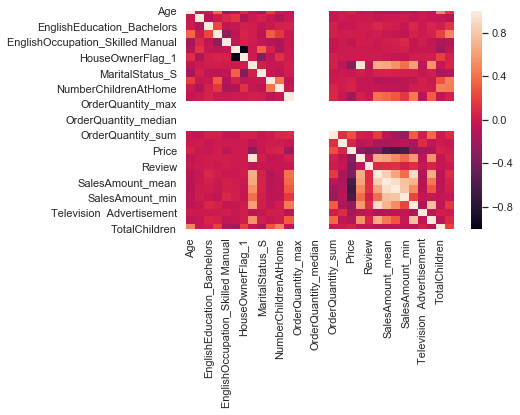

In [206]:
# plotting features on a heatmap to check correlation

import seaborn as sns
%matplotlib inline

sns.heatmap(voted_features.corr())

In [207]:
#Check correlation
voted_features.corr()

Age  CommuteDistance_1-2 Miles  \
Age                               1.00                      -0.02   
CommuteDistance_1-2 Miles        -0.02                       1.00   
EnglishEducation_Bachelors        0.00                      -0.12   
EnglishOccupation_Management      0.35                       0.01   
EnglishOccupation_Skilled Manual -0.18                       0.09   
HouseOwnerFlag_0                 -0.11                       0.15   
HouseOwnerFlag_1                  0.11                      -0.15   
Manufacturer                     -0.06                      -0.00   
MaritalStatus_S                  -0.18                       0.05   
NumberCarsOwned                   0.19                      -0.02   
NumberChildrenAtHome             -0.01                      -0.13   
On Promotion                     -0.05                      -0.02   
OrderQuantity_max                  nan                        nan   
OrderQuantity_mean                 nan                        nan   
OrderQuantity_median               nan                        nan   
OrderQuantity_min                  nan                        nan   
OrderQuantity_sum                -0.02                      -0.03   
Other                            -0.01                       0.01   
Price                             0.06                      -0.01   
Quality                          -0.06                      -0.00   
Review                           -0.02                       0.01   
SalesAmount_max                  -0.09                      -0.02   
SalesAmount_mean                 -0.09                      -0.00   
SalesAmount_median               -0.08                       0.01   
SalesAmount_min                  -0.06                       0.03   
SalesAmount_sum                  -0.07                      -0.04   
Television  Advertisement         0.01                      -0.00   
Tenure_Months                    -0.06                      -0.03   
TotalChildren                     0.48                      -0.03   
YearlyIncome                      0.15                      -0.09   

                                  EnglishEducation_Bachelors  \
Age                                                     0.00   
CommuteDistance_1-2 Miles                              -0.12   
EnglishEducation_Bachelors                              1.00   
EnglishOccupation_Management                            0.23   
EnglishOccupation_Skilled Manual                       -0.06   
HouseOwnerFlag_0                                       -0.04   
HouseOwnerFlag_1                                        0.04   
Manufacturer                                            0.02   
MaritalStatus_S                                        -0.06   
NumberCarsOwned                                        -0.01   
NumberChildrenAtHome                                    0.05   
On Promotion                                            0.06   
OrderQuantity_max                                        nan   
OrderQuantity_mean                                       nan   
OrderQuantity_median                                     nan   
OrderQuantity_min                                        nan   
OrderQuantity_sum                                       0.04   
Other                                                  -0.02   
Price                                                  -0.02   
Quality                                                 0.02   
Review                                                  0.02   
SalesAmount_max                                         0.08   
SalesAmount_mean                                        0.05   
SalesAmount_median                                      0.03   
SalesAmount_min                                        -0.02   
SalesAmount_sum                                         0.09   
Television  Advertisement                              -0.00   
Tenure_Months                                           0.07   
TotalChildren                          

*
It is evident that there are number of features which are highly correlated. So we need to test for multicollinearity.

In [208]:
#Missing values
voted_features.isna().mean().sort_values(ascending=False)*100

Quality                            8.35
Television  Advertisement          8.35
Manufacturer                       8.35
Other                              8.35
Price                              8.35
On Promotion                       8.35
Review                             8.35
YearlyIncome                       0.00
NumberCarsOwned                    0.00
MaritalStatus_S                    0.00
HouseOwnerFlag_1                   0.00
HouseOwnerFlag_0                   0.00
EnglishOccupation_Skilled Manual   0.00
EnglishOccupation_Management       0.00
EnglishEducation_Bachelors         0.00
CommuteDistance_1-2 Miles          0.00
NumberChildrenAtHome               0.00
OrderQuantity_median               0.00
OrderQuantity_max                  0.00
OrderQuantity_mean                 0.00
TotalChildren                      0.00
OrderQuantity_min                  0.00
OrderQuantity_sum                  0.00
SalesAmount_max                    0.00
SalesAmount_mean                   0.00


In [209]:
#Replace missing values 
voted_features = voted_features.fillna(voted_features.mode().iloc[0])

# Multicollinearity

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [212]:
features = features[list(score_table[score_table['final_score'] >= 2]['index'])]

In [213]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

C:\Users\Ahmed\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [214]:
# List of all the variables which are not highly correlated and thus can be trusted.
list(vif['Features'])

['Age',
 'EnglishOccupation_Skilled Manual',
 'Manufacturer',
 'OrderQuantity_max',
 'OrderQuantity_mean',
 'OrderQuantity_median',
 'OrderQuantity_min',
 'OrderQuantity_sum',
 'Price',
 'SalesAmount_max',
 'SalesAmount_median',
 'SalesAmount_min',
 'Television  Advertisement',
 'Tenure_Months']

In [215]:
#Describe features data
features.describe()

Age  EnglishOccupation_Skilled Manual  Manufacturer  \
count 12046.00                          12046.00      12046.00   
mean     43.58                              0.25          0.10   
std      11.61                              0.43          0.30   
min      25.00                              0.00          0.00   
25%      34.00                              0.00          0.00   
50%      41.00                              0.00          0.00   
75%      51.00                              1.00          0.00   
max      97.00                              1.00          1.00   

       OrderQuantity_max  OrderQuantity_mean  OrderQuantity_median  \
count           12046.00            12046.00              12046.00   
mean                1.00                1.00                  1.00   
std                 0.00                0.00                  0.00   
min                 1.00                1.00                  1.00   
25%                 1.00                1.00                  1.00   
50%                 1.00                1.00                  1.00   
75%                 1.00                1.00                  1.00   
max                 1.00                1.00                  1.00   

       OrderQuantity_min  OrderQuantity_sum    Price  SalesAmount_max  \
count           12046.00           12046.00 12046.00         12046.00   
mean                1.00               3.12     0.86          1061.82   
std                 0.00               2.30     0.35          1253.86   
min                 1.00               1.00     0.00             2.29   
25%                 1.00               2.00     1.00            34.99   
50%                 1.00               3.00     1.00           539.99   
75%                 1.00               4.00     1.00          2294.99   
max                 1.00              67.00     1.00          3578.27   

       SalesAmount_median  SalesAmount_min  Television  Advertisement  \
count            12046.00         12046.00                   12046.00   
mean               425.05           197.69                       0.03   
std                791.80           658.78                       0.17   
min                  2.29             2.29                       0.00   
25%                 16.74             4.99                       0.00   
50%                 31.99             4.99                       0.00   
75%                539.99            28.99                       0.00   
max               3578.27          3578.27                       1.00   

       Tenure_Months  
count       12046.00  
mean            4.50  
std             7.94  
min             0.00  
25%             0.00  
50%             0.00  
75%             7.00  
max            35.00

In [216]:
#Top 5 records
features.head(5)

Age  EnglishOccupation_Skilled Manual  Manufacturer  OrderQuantity_max  \
0   41                                 0          0.00                  1   
1   42                                 0          0.00                  1   
2   39                                 0          0.00                  1   
3   33                                 0          0.00                  1   
4   36                                 0          1.00                  1   

   OrderQuantity_mean  OrderQuantity_median  OrderQuantity_min  \
0                   1                     1                  1   
1                   1                     1                  1   
2                   1                     1                  1   
3                   1                     1                  1   
4                   1                     1                  1   

   OrderQuantity_sum  Price  SalesAmount_max  SalesAmount_median  \
0                  8   1.00          3399.99               44.49   
1                  4   0.00          3399.99             2339.53   
2                  9   1.00          3399.99                9.99   
3                  6   1.00          3399.99             1177.49   
4                  6   1.00          3374.99             1177.49   

   SalesAmount_min  Television  Advertisement  Tenure_Months  
0             4.99                       0.00             27  
1            34.99                       0.00             25  
2             2.29                       0.00             28  
3            21.98                       0.00             27  
4             2.29                       0.00             28

# How to interpret VIF

Variance inflation factors range from 1 upwards. 
The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. 
For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.

A rule of thumb for interpreting the variance inflation factor:
1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

Exactly how large a VIF has to be before it causes issues is a subject of debate. 
What is known is that the more your VIF increases, the less reliable your regression results are going to be. 
In general, a VIF above 10 indicates high correlation and is cause for concern. 
Some authors suggest a more conservative level of 2.5 or above.

# Recap

# Variables shortlisted via different methods

# Filter Method

In [217]:
final_training_data.columns

Index(['EnglishOccupation_Skilled Manual', 'CommuteDistance_1-2 Miles',
       'CommuteDistance_2-5 Miles', 'EnglishOccupation_Professional',
       'MaritalStatus_S', 'CommuteDistance_10+ Miles',
       'EnglishEducation_Graduate Degree', 'HouseOwnerFlag_0',
       'MaritalStatus_M', 'CommuteDistance_5-10 Miles',
       'EnglishOccupation_Management', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'NumberCarsOwned', 'Price', 'OrderQuantity_sum',
       'SalesAmount_sum', 'SalesAmount_min', 'Age', 'Churn'],
      dtype='object')

# Step Forward Feature Selection - Wrapper Method

In [218]:
forward_filtered_features

Index(['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Manufacturer', 'Other', 'Review',
       'Television  Advertisement', 'OrderQuantity_sum', 'OrderQuantity_min',
       'OrderQuantity_mean', 'OrderQuantity_median', 'SalesAmount_sum',
       'SalesAmount_min', 'Age'],
      dtype='object')

# Step Backward Feature Selection - Wrapper Method

In [219]:
back_filtered_features

NameError: name 'back_filtered_features' is not defined

# Vote Based Approach
Algorithms applied:
Weight of Evidence and Information Value
Random Forest
Recursive Feature Elimination - Wrapper Method
Extratrees Classifier
Chi Square - Filter Method
L1 Feature Selection - Embedded Method

In [220]:
voted_features.columns

Index(['Age', 'CommuteDistance_1-2 Miles', 'EnglishEducation_Bachelors',
       'EnglishOccupation_Management', 'EnglishOccupation_Skilled Manual',
       'HouseOwnerFlag_0', 'HouseOwnerFlag_1', 'Manufacturer',
       'MaritalStatus_S', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'On Promotion', 'OrderQuantity_max', 'OrderQuantity_mean',
       'OrderQuantity_median', 'OrderQuantity_min', 'OrderQuantity_sum',
       'Other', 'Price', 'Quality', 'Review', 'SalesAmount_max',
       'SalesAmount_mean', 'SalesAmount_median', 'SalesAmount_min',
       'SalesAmount_sum', 'Television  Advertisement', 'Tenure_Months',
       'TotalChildren', 'YearlyIncome'],
      dtype='object')

# Multicollinearity - Variable Inflation Factor

In [221]:
list(vif['Features'])

['Age',
 'EnglishOccupation_Skilled Manual',
 'Manufacturer',
 'OrderQuantity_max',
 'OrderQuantity_mean',
 'OrderQuantity_median',
 'OrderQuantity_min',
 'OrderQuantity_sum',
 'Price',
 'SalesAmount_max',
 'SalesAmount_median',
 'SalesAmount_min',
 'Television  Advertisement',
 'Tenure_Months']

# Model Training and Selection


Select vif.Features as our final list of variables as correlation has been removed after application of vote based approach.

In [222]:
voted_features.describe()

Age  CommuteDistance_1-2 Miles  EnglishEducation_Bachelors  \
count 12046.00                   12046.00                    12046.00   
mean     43.58                       0.18                        0.29   
std      11.61                       0.38                        0.45   
min      25.00                       0.00                        0.00   
25%      34.00                       0.00                        0.00   
50%      41.00                       0.00                        0.00   
75%      51.00                       0.00                        1.00   
max      97.00                       1.00                        1.00   

       EnglishOccupation_Management  EnglishOccupation_Skilled Manual  \
count                      12046.00                          12046.00   
mean                           0.17                              0.25   
std                            0.37                              0.43   
min                            0.00                              0.00   
25%                            0.00                              0.00   
50%                            0.00                              0.00   
75%                            0.00                              1.00   
max                            1.00                              1.00   

       HouseOwnerFlag_0  HouseOwnerFlag_1  Manufacturer  MaritalStatus_S  \
count          12046.00          12046.00      12046.00         12046.00   
mean               0.33              0.67          0.10             0.46   
std                0.47              0.47          0.30             0.50   
min                0.00              0.00          0.00             0.00   
25%                0.00              0.00          0.00             0.00   
50%                0.00              1.00          0.00             0.00   
75%                1.00              1.00          0.00             1.00   
max                1.00              1.00          1.00             1.00   

       NumberCarsOwned  ...   Review  SalesAmount_max  SalesAmount_mean  \
count         12046.00  ... 12046.00         12046.00          12046.00   
mean              1.49  ...     0.06          1061.82            540.41   
std               1.13  ...     0.24          1253.86            764.85   
min               0.00  ...     0.00             2.29              2.29   
25%               1.00  ...     0.00            34.99             19.99   
50%               2.00  ...     0.00           539.99            109.28   
75%               2.00  ...     0.00          2294.99            867.86   
max               4.00  ...     1.00          3578.27           3578.27   

       SalesAmount_median  SalesAmount_min  SalesAmount_sum  \
count            12046.00         12046.00         12046.00   
mean               425.05           197.69          1568.40   
std                791.80           658.78          2073.54   
min                  2.29             2.29             2.29   
25%                 16.74             4.99            49.48   
50%                 31.99             4.99           539.99   
75%                539.99            28.99          2483.98   
max               3578.27          3578.27         13294.27   

       Television  Advertisement  Tenure_Months  TotalChildren  YearlyIncome  
count                   12046.00       12046.00       12046.00      12046.00  
mean                        0.03           4.50           1.83      56905.20  
std                         0.17           7.94           1.61      32280.71  
min                         0.00           0.00           0.00      10000.00  
25%                         0.00           0.00           0.00      30000.00  
50%                         0.00           0.00           2.00      60000.00  
75%                         0.00           7.00           3.00      70000.00  
max                         1.00          35.00           5.00     170000.00  

[8 rows x 30 columns]

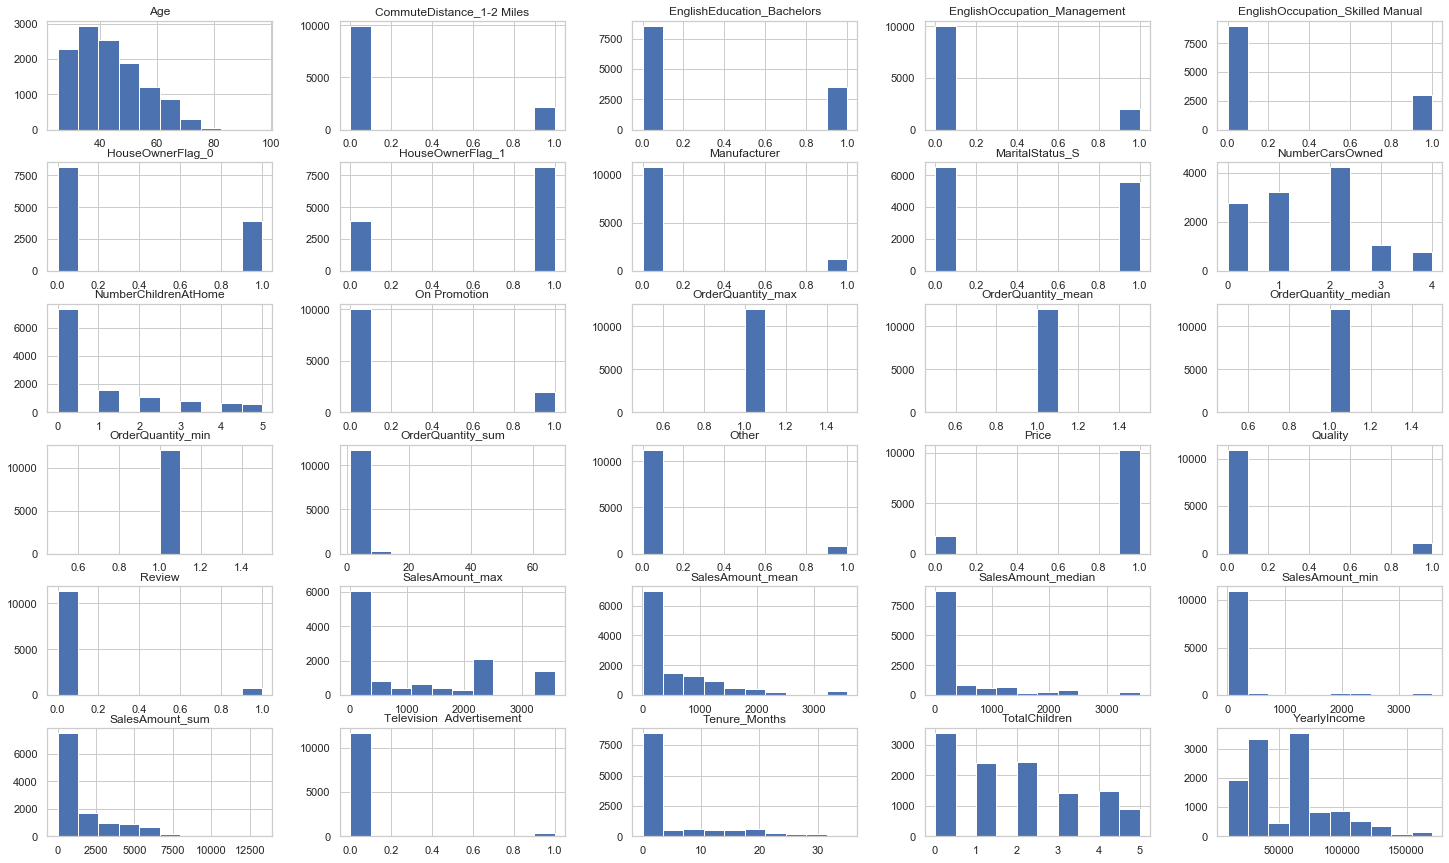

In [223]:
voted_features.hist(figsize=(25,15))
plt.show()

In [224]:
# Import libraries

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# model selection
from sklearn import model_selection

# kpi: evaulating the performance of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [225]:
# evaluation metric
seed=8
scoring = 'f1'

# models we will use
models = []
models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('GPC',GaussianProcessClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('NN',MLPClassifier()))

In [226]:
model

SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    loss='squared_hinge', max_iter=1000,
                                    multi_class='ovr', penalty='l1',
                                    random_state=None, tol=0.0001, verbose=0),
                max_features=None, norm_order=1, prefit=True, threshold=None)

In [227]:
# We will evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: name 'X_train' is not defined

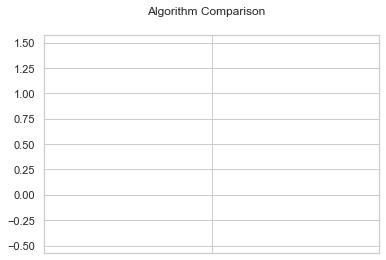

In [228]:
# Visual Comparison of Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It is evident that Decision Tree Classifier (CART) has the best mean score. So we will employ it as our final algorithm.

*
#Models used in the graph above
models.append(('LR', LogisticRegression()))
*# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
*# models.append(('GPC',GaussianProcessClassifier()))
models.append(('NB', GaussianNB()))
*# models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('NN',MLPClassifier()))

# Final Algorithm on Training data split into train and test sets

In [229]:
# We will now divide the data into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(voted_features, labels, test_size=0.2, random_state=31)

In [230]:
# evaluation metric
seed=8
scoring = 'f1'

# models we will use
models = []
models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('GPC',GaussianProcessClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('NN',MLPClassifier()))

#LogisticRegression 

In [231]:
#Employing our final algorithm
lr = LogisticRegression()

#Train it on the full training set
lr.fit(X_train, Y_train)

#Employing our model on test set
predictions = lr.predict(X_test)

#Making predictions
print('F1 Score')
print(f1_score(Y_test, predictions),'\n')

print('Accuracy Score')
print(accuracy_score(Y_test, predictions), '\n')

tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(Y_test, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 Score
0.4046511627906977 

Accuracy Score
0.575103734439834 

Confusion Matrix
[[1038  247]
 [ 777  348]] 

True positives 348
False positives 247
True negatives 1038
False negatives 777 

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.81      0.67      1285
           1       0.58      0.31      0.40      1125

    accuracy                           0.58      2410
   macro avg       0.58      0.56      0.54      2410
weighted avg       0.58      0.58      0.55      2410
 



#KNeighborsClassifier

In [232]:
#Employing our final algorithm
knn = KNeighborsClassifier()

#Train it on the full training set
knn.fit(X_train, Y_train)

#Employing our model on test set
predictions = knn.predict(X_test)

#Making predictions
print('F1 Score')
print(f1_score(Y_test, predictions),'\n')

print('Accuracy Score')
print(accuracy_score(Y_test, predictions), '\n')

tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(Y_test, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

F1 Score
0.563545906829489 

Accuracy Score
0.5995850622406639 

Confusion Matrix
[[822 463]
 [502 623]] 

True positives 623
False positives 463
True negatives 822
False negatives 502 

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1285
           1       0.57      0.55      0.56      1125

    accuracy                           0.60      2410
   macro avg       0.60      0.60      0.60      2410
weighted avg       0.60      0.60      0.60      2410
 



#DecisionTreeClassifier

In [233]:
#Employing our final algorithm
cart = DecisionTreeClassifier()

#Train it on the full training set
cart.fit(X_train, Y_train)

#Employing our model on test set
predictions = cart.predict(X_test)

#Making predictions
print('F1 Score')
print(f1_score(Y_test, predictions),'\n')

print('Accuracy Score')
print(accuracy_score(Y_test, predictions), '\n')

tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(Y_test, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

F1 Score
0.6024955436720143 

Accuracy Score
0.6298755186721992 

Confusion Matrix
[[842 443]
 [449 676]] 

True positives 676
False positives 443
True negatives 842
False negatives 449 

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1285
           1       0.60      0.60      0.60      1125

    accuracy                           0.63      2410
   macro avg       0.63      0.63      0.63      2410
weighted avg       0.63      0.63      0.63      2410
 



#GaussianNB

In [234]:
#Employing our final algorithm
nb = GaussianNB()

#Train it on the full training set
nb.fit(X_train, Y_train)

#Employing our model on test set
predictions = nb.predict(X_test)

#Making predictions
print('F1 Score')
print(f1_score(Y_test, predictions),'\n')

print('Accuracy Score')
print(accuracy_score(Y_test, predictions), '\n')

tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(Y_test, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

F1 Score
0.29553264604810997 

Accuracy Score
0.5746887966804979 

Confusion Matrix
[[1170  115]
 [ 910  215]] 

True positives 215
False positives 115
True negatives 1170
False negatives 910 

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.91      0.70      1285
           1       0.65      0.19      0.30      1125

    accuracy                           0.57      2410
   macro avg       0.61      0.55      0.50      2410
weighted avg       0.60      0.57      0.51      2410
 



#RandomForestClassifier

In [235]:
#Employing our final algorithm
rf = RandomForestClassifier()

#Train it on the full training set
rf.fit(X_train, Y_train)

#Employing our model on test set
predictions = rf.predict(X_test)

#Making predictions
print('F1 Score')
print(f1_score(Y_test, predictions),'\n')

print('Accuracy Score')
print(accuracy_score(Y_test, predictions), '\n')

tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(Y_test, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1 Score
0.5801376597836776 

Accuracy Score
0.645643153526971 

Confusion Matrix
[[966 319]
 [535 590]] 

True positives 590
False positives 319
True negatives 966
False negatives 535 

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1285
           1       0.65      0.52      0.58      1125

    accuracy                           0.65      2410
   macro avg       0.65      0.64      0.64      2410
weighted avg       0.65      0.65      0.64      2410
 



#MLPClassifier

In [236]:
#Employing our final algorithm
nn = MLPClassifier()

#Train it on the full training set
nn.fit(X_train, Y_train)

#Employing our model on test set
predictions = nn.predict(X_test)

#Making predictions
print('F1 Score')
print(f1_score(Y_test, predictions),'\n')

print('Accuracy Score')
print(accuracy_score(Y_test, predictions), '\n')

tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(Y_test, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

F1 Score
0.33929754804506296 

Accuracy Score
0.5863070539419087 

Confusion Matrix
[[1157  128]
 [ 869  256]] 

True positives 256
False positives 128
True negatives 1157
False negatives 869 

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.90      0.70      1285
           1       0.67      0.23      0.34      1125

    accuracy                           0.59      2410
   macro avg       0.62      0.56      0.52      2410
weighted avg       0.62      0.59      0.53      2410
 



C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Choose best predictive trained models 

In [237]:
#It is evident that Decision Tree Classifier has the best mean score. So we will employ it as our final algorithm.

#Employing our final algorithm
cart = DecisionTreeClassifier()

#Train it on the full training set
cart.fit(X_train, Y_train)

#Employing our model on test set
predictions = cart.predict(X_test)

#Making predictions
print('F1 Score')
print(f1_score(Y_test, predictions),'\n')

print('Accuracy Score')
print(accuracy_score(Y_test, predictions), '\n')

tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(Y_test, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

F1 Score
0.6010733452593919 

Accuracy Score
0.6298755186721992 

Confusion Matrix
[[846 439]
 [453 672]] 

True positives 672
False positives 439
True negatives 846
False negatives 453 

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1285
           1       0.60      0.60      0.60      1125

    accuracy                           0.63      2410
   macro avg       0.63      0.63      0.63      2410
weighted avg       0.63      0.63      0.63      2410
 



In [ ]:
#Employing our final algorithm
cart = DecisionTreeClassifier()

#Train it on the full training set
cart.fit(X_train, Y_train)

#Employing our model on test set
predictions = cart.predict(X_test)

#Making predictions
print('F1 Score')
print(f1_score(Y_test, predictions),'\n')

print('Accuracy Score')
print(accuracy_score(Y_test, predictions), '\n')

tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(Y_test, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_test, predictions),'\n')

Text(0.5, 12.5, 'Predicted label')

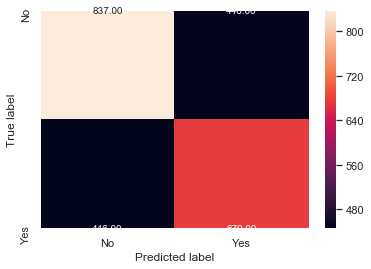

In [231]:
cm = confusion_matrix(Y_test, predictions)

sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

AUC: 0.628904


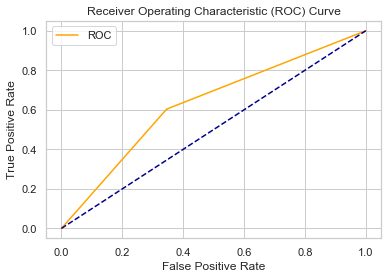

In [232]:
# Reference: https://stackabuse.com/understanding-roc-curves-with-python/

# Calculate roc_auc score
# select only positive values

X_train, X_test, Y_train, Y_test = train_test_split(voted_features, labels, test_size=0.2, random_state=31)

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

predictions1 = model.predict_proba(X_test)
predictions1 = predictions1[:,1]

auc = roc_auc_score(Y_test, predictions1)
print('AUC: %f' % auc)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(Y_test, predictions1)
plot_roc_curve(fpr,tpr)

# Final Algorithm on the whole of training data

In [233]:
all_training_features = pd.concat([X_train, X_test])
all_training_labels = pd.concat([Y_train, Y_test])

In [234]:
cart = DecisionTreeClassifier()
cart.fit(all_training_features, all_training_labels)
all_predictions = cart.predict(all_training_features)

print('F1 Score')
print(f1_score(all_training_labels, all_predictions),'\n')

print('Accuracy Score')
print(accuracy_score(all_training_labels, all_predictions), '\n')

tn, fp, fn, tp = confusion_matrix(all_training_labels, all_predictions).ravel()

# Printing reports
print('Confusion Matrix')
print(confusion_matrix(all_training_labels, all_predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(all_training_labels, all_predictions),'\n')

F1 Score
0.9928186714542191 

Accuracy Score
0.9933587913000166 

Confusion Matrix
[[6436    2]
 [  78 5530]] 

True positives 5530
False positives 2
True negatives 6436
False negatives 78 

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6438
           1       1.00      0.99      0.99      5608

    accuracy                           0.99     12046
   macro avg       0.99      0.99      0.99     12046
weighted avg       0.99      0.99      0.99     12046
 



Text(0.5, 12.5, 'Predicted label')

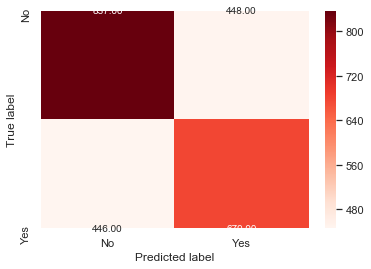

In [235]:
cm = confusion_matrix(Y_test, predictions)

sns.heatmap(cm, annot=True, cmap=plt.cm.Reds,fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

AUC: 0.999911


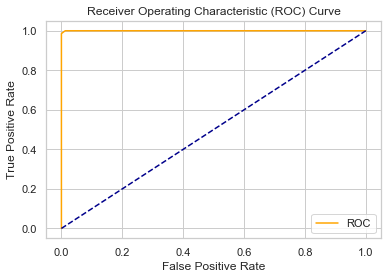

In [236]:
predictions1 = cart.predict_proba(all_training_features)
predictions1 = predictions1[:,1]

auc = roc_auc_score(all_training_labels, predictions1)
print('AUC: %f' % auc)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(all_training_labels, predictions1)
plot_roc_curve(fpr,tpr)

# Decile Plot, KS Statistics

In [237]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

def scoring(features,cart,target):
    score = pd.DataFrame(cart.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [238]:
scores_train = scoring(X_train, cart, Y_train)
scores_test = scoring(X_test, cart, Y_test)

In [239]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

# Lift Chart, Gains Chart (Actual Vs Predicted)

In [240]:
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

In [241]:
def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    plots(agg1,target,'Distribution')

In [242]:
lift_train = pd.concat([X_train,scores_train],axis=1)
lift_test = pd.concat([X_test,scores_test],axis=1)

C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: `item` has been deprecated and will be removed in a future version


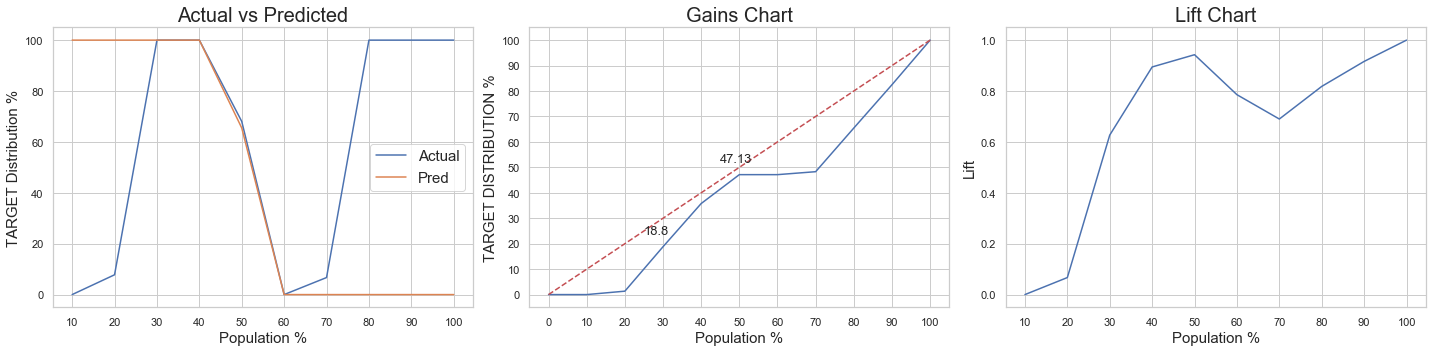

In [243]:
gains(lift_train,['DECILE'],'TARGET','SCORE')

C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: `item` has been deprecated and will be removed in a future version


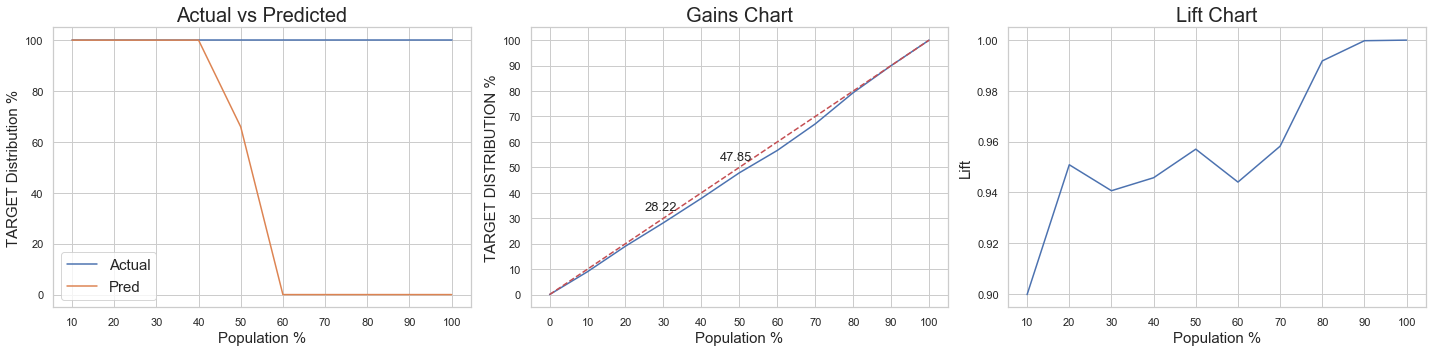

In [244]:
gains(lift_test,['DECILE'],'TARGET','SCORE')

In [245]:
# model saved for future use

from sklearn.externals import joblib

filename = 'final_model.model'
i = [d,cart]
joblib.dump(i,filename)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['final_model.model']

# Score Hold Out Sample Data

In [246]:
all_training_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12046 entries, 9352 to 9832
Data columns (total 30 columns):
Age                                 12046 non-null int32
CommuteDistance_1-2 Miles           12046 non-null int64
EnglishEducation_Bachelors          12046 non-null int64
EnglishOccupation_Management        12046 non-null int64
EnglishOccupation_Skilled Manual    12046 non-null int64
HouseOwnerFlag_0                    12046 non-null int64
HouseOwnerFlag_1                    12046 non-null int64
Manufacturer                        12046 non-null float64
MaritalStatus_S                     12046 non-null int64
NumberCarsOwned                     12046 non-null int64
NumberChildrenAtHome                12046 non-null int64
On Promotion                        12046 non-null float64
OrderQuantity_max                   12046 non-null int64
OrderQuantity_mean                  12046 non-null int64
OrderQuantity_median                12046 non-null int64
OrderQuantity_min             

In [247]:
# Sample data needs to be similar to the trained data

sample_data1 = sample_data[['Age', 'CommuteDistance_1-2 Miles', 'CommuteDistance_2-5 Miles',
                            'EnglishEducation_Bachelors', 'EnglishEducation_Graduate Degree',
                            'EnglishEducation_Partial College', 'EnglishOccupation_Management',
                            'EnglishOccupation_Professional', 'EnglishOccupation_Skilled Manual',
                            'MaritalStatus_S', 'NumberCarsOwned', 'NumberChildrenAtHome',
                            'On Promotion', 'OrderQuantity_max', 'OrderQuantity_mean',
                            'OrderQuantity_median', 'OrderQuantity_min', 'OrderQuantity_sum',
                            'Other', 'Price', 'Quality', 'SalesAmount_max', 'SalesAmount_min',
                            'Television  Advertisement', 'Tenure_Months', 'YearlyIncome','Churn']]

In [248]:
sd_features = sample_data1.drop(columns=['Churn'],axis=1)
sd_labels = sample_data1['Churn']

In [249]:
sd_features.isna().mean().sort_values(ascending=False)*100

On Promotion                       7.08
Television  Advertisement          7.08
Quality                            7.08
Price                              7.08
Other                              7.08
NumberCarsOwned                    0.00
CommuteDistance_1-2 Miles          0.00
CommuteDistance_2-5 Miles          0.00
EnglishEducation_Bachelors         0.00
EnglishEducation_Graduate Degree   0.00
EnglishEducation_Partial College   0.00
EnglishOccupation_Management       0.00
EnglishOccupation_Professional     0.00
EnglishOccupation_Skilled Manual   0.00
MaritalStatus_S                    0.00
YearlyIncome                       0.00
NumberChildrenAtHome               0.00
Tenure_Months                      0.00
OrderQuantity_max                  0.00
OrderQuantity_mean                 0.00
OrderQuantity_median               0.00
OrderQuantity_min                  0.00
OrderQuantity_sum                  0.00
SalesAmount_max                    0.00
SalesAmount_min                    0.00


In [250]:
sd_features = sd_features.fillna(sd_features.mode().iloc[0])

In [251]:
# Recalled the saved model

filename = 'final_model.model'

from sklearn.externals import joblib
d,cart=joblib.load(filename)

In [252]:
# Score the final model (Decision Tree Classifier)

pred_train = cart.predict(sd_features)

ValueError: Number of features of the model must match the input. Model n_features is 30 and input n_features is 26 

In [253]:
def score_new(features, cart):
    score = pd.DataFrame(cart.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    return(score)

In [254]:
scores = score_new(sd_features, cart)

ValueError: Number of features of the model must match the input. Model n_features is 30 and input n_features is 26 

In [255]:
print('There are', np.count_nonzero(pred_train == 0), '0s')

print('There are', np.count_nonzero(pred_train == 1), '1s')

NameError: name 'pred_train' is not defined

In [256]:
final = pd.DataFrame({'CustomerKey':sample_data.CustomerKey,'Churn_Flag':pred_train})

NameError: name 'pred_train' is not defined

In [257]:
# Merge Dimcustomer table with final

final_data = pd.merge(dbo_DC, final, on='CustomerKey',how = 'inner')
final_data.head()

NameError: name 'final' is not defined

In [258]:
final_data.count()

NameError: name 'final_data' is not defined

In [259]:
prob = scores[['SCORE']].values.squeeze()
prob

NameError: name 'scores' is not defined

In [260]:
final_data1 = pd.DataFrame({'CustomerKey':sample_data.CustomerKey,'Churn_Probability':prob})

NameError: name 'prob' is not defined

In [261]:
final_data1.head()

NameError: name 'final_data1' is not defined

In [262]:
# Merge the probabilities

final_data2 = pd.merge(final_data, final_data1, on='CustomerKey', how = 'inner')
final_data2.head()

NameError: name 'final_data' is not defined